The core business of AutoScout24 is the platform and marketing offering for its customers, which allows for the publication and facilitated transaction of vehicle ads. If customers want to push their listing to be higher ranked and more visible, AutoScout24 offers On Top Products, namely “Premium” and “Plus”. On Top Products influence the design and position of a listing in the search result list with “Premium“ shown first, followed by “Plus”. And should lead to increased listing performance.. 
For a sales communication to our customers, i.e. car dealers, we are interested in the increase in performance of listings booked with On Top Products. For this, we would ask you to prepare following questions based on the provided data set:

What is the impact of on top products on listing performance?
Are there any patterns in the data you would consider interesting or unexpected?
What is the influence of other variables included in the data set on listing performance?
Which additional data would you employ for further analyses? 
Please also keep additional steps in mind, e.g. data cleaning, as this is a ”real” data set.

# Reading data to development environment 


In [1]:
# Importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

In [2]:
# Importing the data

#product_articles = pd.read_csv('/home/rohit/PyWDUbuntu/generic/sandeep/AS24_Data_Analyst_Case_Study_data_2021_04.csv', delimiter = ';',
#                              header = 'infer')
df = pd.read_csv('/home/rohit/PyWDUbuntu/generic/sandeep/AS24_Data_Analyst_Case_Study_data_2021_04.csv', delimiter = ';',
                              header = 'infer')

## insert new column for tracking any changes to data during cleaning and preparation

In [3]:
## insert new column for tracking any changes to data during cleaning and preparation
df.insert(0, 'trk', df.index)
df.head(2)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008


In [4]:
df.info()
## total 78321 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trk                      78321 non-null  int64  
 1   article_id               78321 non-null  int64  
 2   product_tier             78321 non-null  object 
 3   make_name                78321 non-null  object 
 4   price                    78321 non-null  int64  
 5   first_zip_digit          78321 non-null  int64  
 6   first_registration_year  78321 non-null  int64  
 7   created_date             78321 non-null  object 
 8   deleted_date             78321 non-null  object 
 9   search_views             78311 non-null  float64
 10  detail_views             78311 non-null  float64
 11  stock_days               78321 non-null  int64  
 12  ctr                      78297 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 7.8+ MB


In [5]:
df.head(3)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013


In [6]:
df.tail(3)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
78318,78318,362425932,Basic,Volkswagen,7850,8,2014,04.11.18,21.11.18,448.0,21.0,16,0.046875
78319,78319,357164227,Basic,Toyota,13945,5,2011,04.09.18,02.10.18,1617.0,29.0,28,0.017934446505875078
78320,78320,353639932,Basic,Volkswagen,38800,7,2018,08.08.18,09.08.18,55.0,2.0,1,0.03454545454545454


In [7]:
cols = df.columns
cols

Index(['trk', 'article_id', 'product_tier', 'make_name', 'price',
       'first_zip_digit', 'first_registration_year', 'created_date',
       'deleted_date', 'search_views', 'detail_views', 'stock_days', 'ctr'],
      dtype='object')

In [8]:
%%script false --no-raise-error

## First attempt at describing column data failed for ctr column

for col in ['price', 'first_zip_digit', 'first_registration_year', #'created_date', 'deleted_date',
            'search_views', 'detail_views', 'stock_days', 'ctr']:
    print(f"----\t{col}\t----")
    print(f"{df[col].describe()}")
    print(f"Median = {df[col].median()}")
## observations:
##     ctr
## found an entry with invalid value = 27.624.309.392.265.100
## 

In [9]:
df[df['ctr'] == '27.624.309.392.265.100']

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
849,849,361161145,Basic,Volkswagen,32450,6,2018,20.10.18,08.11.18,2172.0,60.0,19,27.624.309.392.265.100


In [10]:
60.0 / 2172.0
## has extra decimal places, otherwise value is correct

0.027624309392265192

In [11]:
df.loc[849,:]

trk                                           849
article_id                              361161145
product_tier                                Basic
make_name                              Volkswagen
price                                       32450
first_zip_digit                                 6
first_registration_year                      2018
created_date                             20.10.18
deleted_date                             08.11.18
search_views                               2172.0
detail_views                                 60.0
stock_days                                     19
ctr                        27.624.309.392.265.100
Name: 849, dtype: object

## Data cleaning and culling as per assumptions made

In [12]:
df.head(5)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224


In [13]:
df.sort_values(['article_id'], axis=0, inplace=True)

In [14]:
df.head(5)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.07407407407407407
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.07040816326530612
45555,45555,347232416,Basic,Mercedes-Benz,16950,7,2013,04.07.18,15.09.18,1564.0,118.0,74,0.07544757033248081
77759,77759,347232417,Basic,Skoda,2995,6,2010,04.07.18,16.07.18,2372.0,183.0,12,0.07715008431703205
72821,72821,347232422,Basic,Toyota,4300,4,2008,04.07.18,01.10.18,3215.0,208.0,89,0.06469673405909798


In [15]:
## checking article_id unique
## 16 duplicates exists
ttl_data = len(df)
uniq_art_id = len(df['article_id'].unique())
print(f"total = {ttl_data}, unique = {uniq_art_id}, difference = {ttl_data - uniq_art_id}")

total = 78321, unique = 78305, difference = 16


In [16]:
len(df[df.duplicated('article_id', keep=False)])

32

In [17]:
## viewing the duplicates
df[df.duplicated('article_id', keep=False)].head(10)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
50392,50392,350214314,Premium,Opel,8250,5,2012,20.07.18,26.07.18,67.0,5.0,6,0.07462686567164178
39745,39745,350214314,Basic,Opel,8250,5,2012,20.07.18,01.08.18,134.0,10.0,12,0.07462686567164178
15997,15997,350214315,Premium,Nissan,13650,5,2009,20.07.18,26.07.18,184.0,8.0,6,0.043478260869565216
63500,63500,350214315,Basic,Nissan,13650,5,2009,20.07.18,01.08.18,368.0,16.0,12,0.043478260869565216
66323,66323,354755822,Basic,Mercedes-Benz,6950,7,2005,20.08.18,20.10.18,5654.0,404.0,61,0.07145383799080297
39922,39922,354755822,Plus,Mercedes-Benz,6950,7,2005,20.08.18,18.10.18,2827.0,202.0,59,0.07145383799080297
9440,9440,354755824,Basic,Toyota,10950,7,2010,20.08.18,20.10.18,4784.0,222.0,61,0.04640468227424749
70393,70393,354755824,Plus,Toyota,10950,7,2010,20.08.18,18.10.18,2392.0,111.0,59,0.04640468227424749
6451,6451,354755829,Basic,Ford,10950,7,2009,20.08.18,20.10.18,5126.0,242.0,61,0.04721030042918455
33971,33971,354755829,Plus,Ford,10950,7,2009,20.08.18,18.10.18,2563.0,121.0,59,0.04721030042918455


16 duplicates found. In each case, the search_views, detail_views and stock_days
is double the other corresponding entry.
Entry under Basic has double the value of entry under Premium/Plus.

Since the deleted_date for Basic is earlier than the other duplicate entry: assuming the non-Basic entry is more genuine and deleting all 16 Basic entries for further analysis.

In [18]:
df_dupl_art_id = df[df.duplicated('article_id', keep=False)]
print(len(df_dupl_art_id))
dupl_basic_mask = df_dupl_art_id.loc[df_dupl_art_id['product_tier']=='Basic', :].index

32


In [19]:
## indexes of rows which are duplicated - but having product_tier as 'Basic'
dupl_basic_mask

Int64Index([39745, 63500, 66323,  9440,  6451, 51125, 68339, 53974, 34016,
             5313, 45945, 23302, 69702,  5323, 62715, 22327],
           dtype='int64')

In [20]:
print(f"before = {len(df)}")
print(f"after deletion should be = 78321 - 16 = {78321 - 16}")
df.drop(labels=dupl_basic_mask, inplace=True)
print(f"after removal of Basic type duplicates = {len(df)}")

before = 78321
after deletion should be = 78321 - 16 = 78305
after removal of Basic type duplicates = 78305


clearning ctr row with invalid value invalid value = 27.624.309.392.265.100

In [21]:
5/67

0.07462686567164178

In [22]:
## correct value
df['ctr'].replace({'27.624.309.392.265.100': 0.027624309392265192}, inplace=True)
df.loc[849,:]

trk                               849
article_id                  361161145
product_tier                    Basic
make_name                  Volkswagen
price                           32450
first_zip_digit                     6
first_registration_year          2018
created_date                 20.10.18
deleted_date                 08.11.18
search_views                   2172.0
detail_views                     60.0
stock_days                         19
ctr                          0.027624
Name: 849, dtype: object

In [23]:
## Even after this one correction, found 105 additional entries.

ctrmask = pd.to_numeric(df['ctr'], errors='coerce').isna()
ctrmask.sum()

105

In [24]:
## So now simply creating a new column with explicit calculation and replacing all the values.

df['ctrCalc'] = df['detail_views'] / df['search_views']

In [25]:
## But first also checking that the detail_view count <= search_view count
##     and taking corrective action

df[df['ctrCalc'] >= 1.0]

## found two invalid entries. Assuming the values are reversed.
## So correcting these two rows and then doing the correct ctr column calcution

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,ctrCalc
56634,56634,348704375,Basic,Opel,5900,3,2007,12.07.18,12.07.18,3.0,3.0,0,1.0,1.000000
39172,39172,351144455,Basic,Nissan,16970,1,2013,28.07.18,28.07.18,15.0,21.0,0,01. Apr,1.400000
32000,32000,355652116,Basic,Fiat,6650,7,2008,28.08.18,28.08.18,12.0,22.0,0,18.333.333.333.333.300,1.833333


In [26]:
df.loc[[32000,39172],:]

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,ctrCalc
32000,32000,355652116,Basic,Fiat,6650,7,2008,28.08.18,28.08.18,12.0,22.0,0,18.333.333.333.333.300,1.833333
39172,39172,351144455,Basic,Nissan,16970,1,2013,28.07.18,28.07.18,15.0,21.0,0,01. Apr,1.400000


In [27]:
## exchange the values for the two incorrect rows for search and detail views columns
df.loc[[32000,39172],['search_views', 'detail_views']] = df.loc[[32000,39172],['detail_views', 'search_views']].to_numpy()
df.loc[[32000,39172],:]

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,ctrCalc
32000,32000,355652116,Basic,Fiat,6650,7,2008,28.08.18,28.08.18,22.0,12.0,0,18.333.333.333.333.300,1.833333
39172,39172,351144455,Basic,Nissan,16970,1,2013,28.07.18,28.07.18,21.0,15.0,0,01. Apr,1.400000


In [28]:
df.head(2)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,ctrCalc
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.07407407407407407,0.074074
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.07040816326530612,0.070408


In [29]:
## And that detail_views and search_views is numeric

## Found 10 invalid entries with NaN values
## The same 10 entries have invalid values for the search_views and detail_views. As these are core to the
##     entire analyis - simply deleting these entries for further analysis.

svmask = pd.to_numeric(df['search_views'], errors='coerce').isna()
print(svmask.sum())
dvmask = pd.to_numeric(df['detail_views'], errors='coerce').isna()
print(dvmask.sum())

10
10


In [30]:
df[svmask]

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,ctrCalc
66498,66498,349581063,Basic,Subaru,1,5,2006,16.07.18,11.09.18,NaN,NaN,57,NaN,NaN
60758,60758,350270138,Basic,Ford,5450,2,2009,20.07.18,26.07.18,NaN,NaN,7,NaN,NaN
57353,57353,350278423,Basic,BMW,10950,9,2006,20.07.18,20.07.18,NaN,NaN,-1,NaN,NaN
72408,72408,358837338,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
47870,47870,358837344,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
27830,27830,358837359,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
63577,63577,358837366,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
21423,21423,358837372,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
65127,65127,358837392,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
10151,10151,363161664,Basic,Renault,4950,3,2011,12.11.18,01.03.19,NaN,NaN,109,NaN,NaN


In [31]:
df[dvmask]

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,ctrCalc
66498,66498,349581063,Basic,Subaru,1,5,2006,16.07.18,11.09.18,NaN,NaN,57,NaN,NaN
60758,60758,350270138,Basic,Ford,5450,2,2009,20.07.18,26.07.18,NaN,NaN,7,NaN,NaN
57353,57353,350278423,Basic,BMW,10950,9,2006,20.07.18,20.07.18,NaN,NaN,-1,NaN,NaN
72408,72408,358837338,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
47870,47870,358837344,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
27830,27830,358837359,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
63577,63577,358837366,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
21423,21423,358837372,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
65127,65127,358837392,Basic,Volkswagen,2999,5,2003,24.09.18,24.09.18,NaN,NaN,0,NaN,NaN
10151,10151,363161664,Basic,Renault,4950,3,2011,12.11.18,01.03.19,NaN,NaN,109,NaN,NaN


In [32]:
## The rows with invalid entries for search/detail views match up exactly
all(svmask == dvmask)

True

In [33]:
before_len = len(df)
df = df[~dvmask]
after_len = len(df)
print(f"before = {before_len}, after = {after_len}, deleted = {before_len - after_len}")

before = 78305, after = 78295, deleted = 10


In [34]:
pd.to_numeric(df['detail_views'], errors='coerce').isna().sum()

0

In [35]:
pd.to_numeric(df['search_views'], errors='coerce').isna().sum()

0

In [36]:
## Recomputing the ctr using cleaned data and replacing the values. Removing the new column inserted above

df.loc[:, 'ctr'] = df['detail_views'] / df['search_views']
del(df['ctrCalc'])
df.head(2)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408


In [37]:
## checking the created_date values are in the expected pattern of DD.MM.YY format

crvalid = df['created_date'].str.match(r'^[0-3]?[0-9]\.[0-3]?[0-9]\.(?:[0-9]{2})?[0-9]{2}$')
#^[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}$
print(len(df[crvalid]))

78295


In [38]:
df[crvalid].head(3)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408
45555,45555,347232416,Basic,Mercedes-Benz,16950,7,2013,04.07.18,15.09.18,1564.0,118.0,74,0.075448


In [39]:
df[~crvalid].head()

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr


In [40]:
## checking the deleted_date are in the expected pattern of DD.MM.YY format

devalid = df['deleted_date'].str.match(r'^[0-3]?[0-9]\.[0-3]?[0-9]\.(?:[0-9]{2})?[0-9]{2}$')
print(len(df[devalid]))

78295


In [41]:
df[devalid].head(3)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408
45555,45555,347232416,Basic,Mercedes-Benz,16950,7,2013,04.07.18,15.09.18,1564.0,118.0,74,0.075448


In [42]:
df[~devalid].head()

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr


In [43]:
## now all the dates are in uniform format of DD.MM.YY

print(f"created_date min={df['created_date'].str.slice(start=-2).min()}")
print(f"created_date max={df['created_date'].str.slice(start=-2).max()}")
print(f"deleted_date min={df['deleted_date'].str.slice(start=-2).min()}")
print(f"deleted_date max={df['deleted_date'].str.slice(start=-2).max()}")

## all creations done only in 2018, and all deletions in 2019

created_date min=18
created_date max=18
deleted_date min=18
deleted_date max=19


In [44]:
## convert to datetime objects columns
df['cr_dt'] = pd.to_datetime(df['created_date'], dayfirst=True)
df['de_dt'] = pd.to_datetime(df['deleted_date'], dayfirst=True)
df.head(2)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074,2018-07-04,2018-07-13
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408,2018-07-04,2018-08-14


In [45]:
## checking the stock days

print(f"count negative stock_days = {len(df.loc[df['stock_days']<0, :])}")
print(f"max value for negative stock_days = {df.loc[df['stock_days']<0, :]['stock_days'].min()}")
print(f"min value for negative stock_days = {df.loc[df['stock_days']<0, :]['stock_days'].max()}")

## 92 rows with stock_days of -ve value which is nonsensical. Minimum is -3 and maximum is -1.
## Treating all these 92 rows as suspect information 

count negative stock_days = 92
max value for negative stock_days = -3
min value for negative stock_days = -1


In [46]:
# Some rows with stock_days < 0 i.e. negative values
df.loc[df['stock_days']<0, :].head(3)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
1269,1269,347248705,Basic,Volkswagen,13925,7,2013,04.07.18,04.07.18,29.0,5.0,-1,0.172414,2018-07-04,2018-07-04
10558,10558,347261537,Basic,Renault,4499,9,2010,04.07.18,04.07.18,89.0,2.0,-1,0.022472,2018-07-04,2018-07-04
50489,50489,348682704,Basic,Citroen,2149,1,2009,12.07.18,12.07.18,238.0,21.0,-1,0.088235,2018-07-12,2018-07-12


In [47]:
# Some rows with stock_days = -3
## 4 such rows exist
print(len(df.loc[df['stock_days']==-3, :]))
df.loc[df['stock_days']==-3, :].head(3)

4


,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
43559,43559,355449450,Basic,Citroen,950,9,2003,24.08.18,24.08.18,43.0,0.0,-3,0.000000,2018-08-24,2018-08-24
22571,22571,357509576,Basic,BMW,13950,3,2004,08.09.18,08.09.18,143.0,5.0,-3,0.034965,2018-09-08,2018-09-08
7465,7465,360447771,Basic,Audi,24850,8,2017,12.10.18,12.10.18,17.0,2.0,-3,0.117647,2018-10-12,2018-10-12


In [48]:
# Some rows with stock_days = -2
## 3 such rows exist
print(len(df.loc[df['stock_days']==-2, :]))
df.loc[df['stock_days']==-2, :].head(3)

3


,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
75200,75200,348688736,Basic,Jeep,36345,7,2014,12.07.18,12.07.18,10.0,1.0,-2,0.100000,2018-07-12,2018-07-12
72780,72780,361506899,Basic,Volkswagen,3850,3,2010,24.10.18,25.10.18,370.0,12.0,-2,0.032432,2018-10-24,2018-10-25
6796,6796,361528432,Basic,Volvo,16900,7,2015,24.10.18,25.10.18,13.0,3.0,-2,0.230769,2018-10-24,2018-10-25


In [49]:
# Some rows with stock_days = -1
## 85 such rows exist
print(len(df.loc[df['stock_days']==-1, :]))
df.loc[df['stock_days']==-1, :].head(3)

85


,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
1269,1269,347248705,Basic,Volkswagen,13925,7,2013,04.07.18,04.07.18,29.0,5.0,-1,0.172414,2018-07-04,2018-07-04
10558,10558,347261537,Basic,Renault,4499,9,2010,04.07.18,04.07.18,89.0,2.0,-1,0.022472,2018-07-04,2018-07-04
50489,50489,348682704,Basic,Citroen,2149,1,2009,12.07.18,12.07.18,238.0,21.0,-1,0.088235,2018-07-12,2018-07-12


In [50]:
# Some rows with stock_days = 0
## 1088 such rows exist
print(len(df.loc[df['stock_days']==0, :]))
df.loc[df['stock_days']==0, :].head(3)

1088


,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
56515,56515,347246903,Basic,Honda,11900,2,2012,04.07.18,04.07.18,9.0,2.0,0,0.222222,2018-07-04,2018-07-04
69344,69344,347246913,Basic,Toyota,15450,2,2011,04.07.18,04.07.18,18.0,2.0,0,0.111111,2018-07-04,2018-07-04
58529,58529,347247077,Basic,Ford,15275,1,2018,04.07.18,04.07.18,3.0,1.0,0,0.333333,2018-07-04,2018-07-04


In [51]:
## Thus    stock_days            count of rows
##             0                    1088
##             -1                    85
##             -2                    3
##             -3                    4
##            negative               92

## ASSUMPTON: stock_days = 0 is a genuine entry with same day sale of listed car.
##            any -ve value assumed as suspect entry and removing all 92 such entries.

print(len(df))
print(f"78311 - 92 = {78311 - 92}")
df = df[df['stock_days']>=0]
print(len(df))

78295
78311 - 92 = 78219
78203


In [52]:
## computing stock days using pandas functions on the newly created datetime columns
df['c_st_days'] = df['de_dt'] - df['cr_dt']
df.head()

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt,c_st_days
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074,2018-07-04,2018-07-13,9 days
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408,2018-07-04,2018-08-14,41 days
45555,45555,347232416,Basic,Mercedes-Benz,16950,7,2013,04.07.18,15.09.18,1564.0,118.0,74,0.075448,2018-07-04,2018-09-15,73 days
77759,77759,347232417,Basic,Skoda,2995,6,2010,04.07.18,16.07.18,2372.0,183.0,12,0.077150,2018-07-04,2018-07-16,12 days
72821,72821,347232422,Basic,Toyota,4300,4,2008,04.07.18,01.10.18,3215.0,208.0,89,0.064697,2018-07-04,2018-10-01,89 days


In [53]:
df['c_st_days'] = df['c_st_days'].dt.days

In [54]:
df.head(3)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt,c_st_days
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074,2018-07-04,2018-07-13,9
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408,2018-07-04,2018-08-14,41
45555,45555,347232416,Basic,Mercedes-Benz,16950,7,2013,04.07.18,15.09.18,1564.0,118.0,74,0.075448,2018-07-04,2018-09-15,73


In [55]:
## Comparing the difference between the actual value provided and the days difference calculated using pandas.
## There are 11759 data points with difference > 0 days
##     but, there are only 303 data points with a difference > 1 days
## The difference is not large +- 4 days. So going to analyze with the values already provided for stock_days

print((df['stock_days'] - df['c_st_days']).unique())
print( len(df.loc[ (df['stock_days'] - df['c_st_days']).abs() > 0 , :]) )
print( len(df.loc[ (df['stock_days'] - df['c_st_days']).abs() > 1 , :]) )

del df['c_st_days']

[ 0  1 -1 -3 -2  2  3 -4  4]
11759
303


In [56]:
df.head(2)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074,2018-07-04,2018-07-13
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408,2018-07-04,2018-08-14


In [57]:
## attempting descriptive stats again

for col in ['price', 'first_zip_digit', 'first_registration_year',
            'search_views', 'detail_views', 'stock_days', 'ctr', 'cr_dt', 'de_dt']:
    print(f"----\t{col}\t----")
    print(f"{df[col].describe()}")
    print(f"Median = {df[col].median()}")

## observations - some suspicious and other general stuff.

##    price:
## min = 50

##    first_registration_year:
## min = 1924 , max = 2106

##    search_views:
## max = 608754

##    created_date - cr_dt
## all entries made between 04.07.2018 to 28.11.2018, on 35 unique dates.
## maximum entries (3436) on 16.11.2018.

##    deleted_date - de_dt
## all entries made between 04.07.2018 to 03.04.2019, on 273 unique dates. 
## maximum entries (947) on 01.12.2018.

----	price	----
count     78203.000000
mean      15073.458205
std       16380.134636
min          50.000000
25%        5750.000000
50%       10925.000000
75%       18895.000000
max      249888.000000
Name: price, dtype: float64
Median = 10925.0
----	first_zip_digit	----
count    78203.000000
mean         4.630922
std          2.354061
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: first_zip_digit, dtype: float64
Median = 5.0
----	first_registration_year	----
count    78203.000000
mean      2011.092401
std          6.538363
min       1924.000000
25%       2008.000000
50%       2013.000000
75%       2015.000000
max       2106.000000
Name: first_registration_year, dtype: float64
Median = 2013.0
----	search_views	----
count     78203.000000
mean       2291.748552
std        6262.756010
min           0.000000
25%         369.000000
50%         921.000000
75%        2235.500000
max      608754.000000
Name: search_views, dty

<ipython-input-57-f36b31956750>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(f"{df[col].describe()}")
<ipython-input-57-f36b31956750>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(f"{df[col].describe()}")


In [58]:
## exploring first_registration_year column

## note that all the created_date are in 04.07.2018 to 28.11.2018.
## Count of data points:
##     Before 1950 = 22     -- these could be antiques, so possible, assuming as valid entries.
##     2018        = 6874   -- ok
##     2019        = 72     -- not possible, future date
##     2020        = 1      -- not possible, future date
##     2106        = 1      -- not possible, future date

## So deleting these 74 total data points with registration year after 2018.


df_first_reg_year_unique = df['first_registration_year'].unique()
df_first_reg_year_unique.sort()
print(df_first_reg_year_unique)
print(f"\n")
print(f"Before 1950 = {len(df.loc[df['first_registration_year'] < 1950,:])}")
print(f"In     2018 = {len(df.loc[df['first_registration_year'] == 2018,:])}")
print(f"In     2019 = {len(df.loc[df['first_registration_year'] == 2019,:])}")
print(f"In     2020 = {len(df.loc[df['first_registration_year'] == 2020,:])}")
print(f"In     2106 = {len(df.loc[df['first_registration_year'] == 2106,:])}")

[1924 1925 1928 1931 1932 1933 1935 1936 1939 1941 1942 1943 1946 1947
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2106]


Before 1950 = 22
In     2018 = 6874
In     2019 = 72
In     2020 = 1
In     2106 = 1


In [59]:
df.loc[df['first_registration_year'] == 2106,:]

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
36302,36302,358877131,Basic,Opel,9250,7,2106,24.09.18,26.09.18,113.0,5.0,2,0.044248,2018-09-24,2018-09-26


In [60]:
df.loc[df['first_registration_year'] == 2020,:]

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
77691,77691,359772338,Basic,Mercedes-Benz,1450,5,2020,04.10.18,05.02.19,100439.0,3065.0,123,0.030516,2018-10-04,2019-02-05


In [61]:
## ASSUMPTON: first_registration_year must < 2018 to be a genuine entry and be retained for analysis.
## So deleting these 74 total data points with registration year after 2018.

print(len(df))
print(f"78219 - 74 = {78219 - 74}")
df = df[df['first_registration_year']<=2018]
print(len(df))

78203
78219 - 74 = 78145
78129


In [62]:
df.head(2)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074,2018-07-04,2018-07-13
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408,2018-07-04,2018-08-14


In [63]:
## product_tier columns has valid only valid values.
df['product_tier'].unique()

array(['Basic', 'Premium', 'Plus'], dtype=object)

## during regression analysis later on - found invalid NaN in ctr column
Problem was that the search_views and detail_views were 0. So the ctr = search/detail = NaN
Replaced those values with 0.0 for ctr

In [64]:
X_set = ['search_views', 'detail_views', 'ctr']

In [65]:
for col in X_set:
    #print(f"{col} : {df[[col]].dtypes}")
    print(f"{col} value ::: {df[col][0]} : {type(df[col][0])}")

search_views value ::: 3091.0 : <class 'numpy.float64'>
detail_views value ::: 123.0 : <class 'numpy.float64'>
ctr value ::: 0.03979294726625687 : <class 'numpy.float64'>


In [66]:
for col in X_set:
    print(f"{col} : {df[col].isnull().sum()}")

search_views : 0
detail_views : 0
ctr : 13


ctr has 13 rows with invalid values

In [67]:
#X, y = df[X_set].to_numpy(), df[['stock_days']].to_numpy()
X = df['ctr'].to_numpy()

In [68]:
#print(np.any(np.isnan(y)))      ## expecting False
#print(np.all(np.isfinite(y)))   ## expecting True
print(np.any(np.isnan(X)))      ## expecting False
print(np.all(np.isfinite(X)))   ## expecting True

True
False


In [69]:
df[df['ctr'].isnull()]

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
6738,6738,355684985,Basic,Volvo,5950,8,2009,28.08.18,28.08.18,0.0,0.0,0,NaN,2018-08-28,2018-08-28
72620,72620,359233783,Basic,Audi,1039,4,2016,28.09.18,28.09.18,0.0,0.0,0,NaN,2018-09-28,2018-09-28
69176,69176,360460879,Basic,Mercedes-Benz,30445,7,2014,12.10.18,12.10.18,0.0,0.0,0,NaN,2018-10-12,2018-10-12
78057,78057,360460880,Basic,Mercedes-Benz,994,7,2014,12.10.18,12.10.18,0.0,0.0,0,NaN,2018-10-12,2018-10-12
68584,68584,360460887,Basic,Opel,16445,7,2009,12.10.18,12.10.18,0.0,0.0,0,NaN,2018-10-12,2018-10-12
28823,28823,360460890,Basic,Mercedes-Benz,26445,7,2011,12.10.18,12.10.18,0.0,0.0,0,NaN,2018-10-12,2018-10-12
52291,52291,360460896,Basic,Mercedes-Benz,1194,7,2018,12.10.18,12.10.18,0.0,0.0,0,NaN,2018-10-12,2018-10-12
26122,26122,360460897,Basic,Mercedes-Benz,22445,7,2011,12.10.18,12.10.18,0.0,0.0,0,NaN,2018-10-12,2018-10-12
38923,38923,360471136,Basic,Audi,1500,2,2012,12.10.18,12.10.18,0.0,0.0,0,NaN,2018-10-12,2018-10-12
43222,43222,360493605,Basic,Mercedes-Benz,37500,3,2002,12.10.18,12.10.18,0.0,0.0,0,NaN,2018-10-12,2018-10-12


In [70]:
len(df[df['ctr'].isnull()])

13

Since only 13 such rows, dropping these from further analyis

In [71]:
print(f"Before = {len(df)}")
print(f"Length after dropping should = 78129 - 13 = {78129 - 13}")
df = df[df['ctr'].notna()]
print(f"After = {len(df)}")

Before = 78129
Length after dropping should = 78129 - 13 = 78116
After = 78116


# Visualising the data

In [72]:
df.columns

Index(['trk', 'article_id', 'product_tier', 'make_name', 'price',
       'first_zip_digit', 'first_registration_year', 'created_date',
       'deleted_date', 'search_views', 'detail_views', 'stock_days', 'ctr',
       'cr_dt', 'de_dt'],
      dtype='object')

In [73]:
df.head(2)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074,2018-07-04,2018-07-13
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408,2018-07-04,2018-08-14


In [74]:
df1 = df.copy()

## Descriptive statistics and basic plots for search_views, detail_views, ctr vs product_tier

In [75]:
## function to combine the descriptive stats for "_which_col" column name by product_tier
##   and place into a combined dataframe.  

def make_combined_describe_stats(_df, _which_col=None):
    df_out = _df.loc[df['product_tier']=='Basic', :][_which_col].describe().to_frame()
    df_out.rename(columns={_which_col: 'Stats_Basic'}, inplace = True)

    df_out = df_out.merge(
        _df.loc[df['product_tier']=='Plus', :][_which_col].describe().to_frame(),
        left_index=True, right_index=True
    )
    df_out.rename(columns={_which_col: 'Stats_Plus'}, inplace = True)

    df_out = df_out.merge(
        _df.loc[df['product_tier']=='Premium', :][_which_col].describe().to_frame(),
        left_index=True, right_index=True
    )
    df_out.rename(columns={_which_col: 'Stats_Premium'}, inplace = True)

    median_row = {
        'Stats_Basic': _df.loc[df['product_tier']=='Basic', :][_which_col].median(),
        'Stats_Plus': _df.loc[df['product_tier']=='Plus', :][_which_col].median(),
        'Stats_Premium': _df.loc[df['product_tier']=='Premium', :][_which_col].median()
    }
    df_out.loc['median'] = median_row

    return df_out

In [76]:
## 96% of articles are in Basic. Not even 1% in Plus, with 3% in Premium

ttl = 0
prod_tier_cnts = dict()
for val in ['Basic', 'Plus', 'Premium']:
    temp = len(df.loc[df['product_tier']==val, :])
    ttl += temp
    prod_tier_cnts[val] = temp
for k, v in prod_tier_cnts.items():
    print(f"{k:8} :\tcount = {v:6} ({v*100/ttl:.2f})")
print(f"Total    :\tcount = {ttl:6}")

Basic    :	count =  75216 (96.29)
Plus     :	count =    576 (0.74)
Premium  :	count =   2324 (2.98)
Total    :	count =  78116


### search_views vs product_tier

Observations from box plot and the descriptive stats.

Mean - values as expected
Highest for Premium (13.5k), lower for Plus (6.7k), lowest for Basic (1.9k)
Basic:Plus:Premium = 1 : 3.5 : 7.0

Median - values as expected
Highest for Premium (7k), lower for Plus (4k), lowest for Basic (875)
Basic:Plus:Premium = 1 : 4.5 : 8.0

For higher category, the mean and the median for search_views increased.
The mean for Premium is 7 times mean for Basic.
The median for Premium is 8 times median for Basic.

<AxesSubplot:xlabel='product_tier', ylabel='Number of search views'>

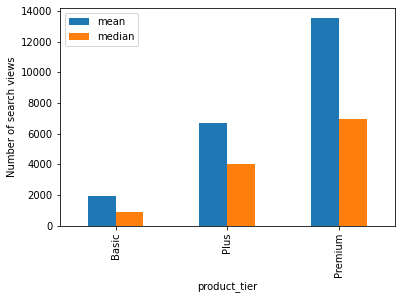

In [77]:
df1.groupby("product_tier")['search_views'].agg(['mean','median']).plot(kind='bar',label=True,ylabel="Number of search views")

In [78]:
df1.groupby("product_tier")['search_views'].agg(['mean','median', 'max', 'min', 'count', 'std'])

,mean,median,max,min,count,std
product_tier,,,,,,
Basic,1910.446115,875.0,608754.0,1.0,75216,4853.220219
Plus,6719.444444,4014.5,100981.0,54.0,576,8572.305571
Premium,13514.135112,6956.5,335376.0,50.0,2324,19987.566715


          Stats_Basic     Stats_Plus  Stats_Premium
count    75216.000000     576.000000    2324.000000
mean      1910.446115    6719.444444   13514.135112
std       4853.220219    8572.305571   19987.566715
min          1.000000      54.000000      50.000000
25%        355.000000    1897.750000    2796.250000
50%        875.000000    4014.500000    6956.500000
75%       2068.000000    8439.250000   17263.750000
max     608754.000000  100981.000000  335376.000000
median     875.000000    4014.500000    6956.500000


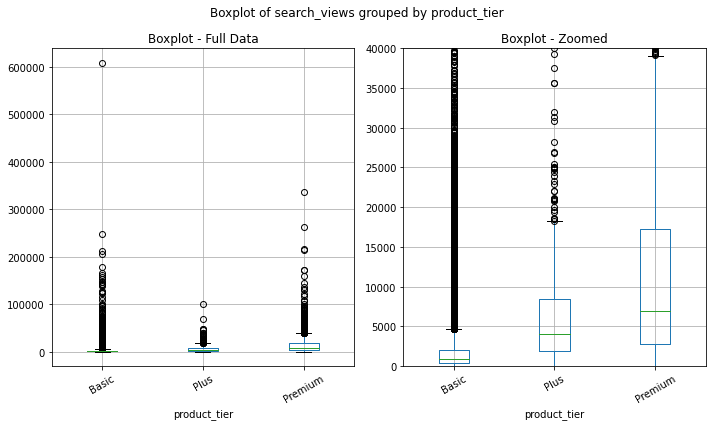

In [79]:
df_sv_vs_prodTier = make_combined_describe_stats(df, _which_col='search_views')
print(df_sv_vs_prodTier)

## show side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
df.boxplot('search_views','product_tier',rot = 30, ax=axes[0])
df.boxplot('search_views','product_tier',rot = 30, ax=axes[1]).set_ylim(0.0, 40000.0)
fig.suptitle('Boxplot of search_views grouped by product_tier')
axes[0].title.set_text('Boxplot - Full Data')
axes[1].title.set_text('Boxplot - Zoomed')
fig.tight_layout()

### detail_views vs product_tier

Observations from box plot and the descriptive stats.

Mean - values as expected
Highest for Premium (402), lower for Plus (248), lowest for Basic (82)
Basic:Plus:Premium = 1 : 3.0 : 4.8

Median - values as expected
Highest for Premium (224), lower for Plus (151), lowest for Basic (35)
Basic:Plus:Premium = 1 : 4.3 : 6.4

For higher category, the mean and the median for detail_views increased.
The mean for Premium is 5 times mean for Basic.
The median for Premium is 6 times median for Basic.

<AxesSubplot:xlabel='product_tier', ylabel='Number of detail views'>

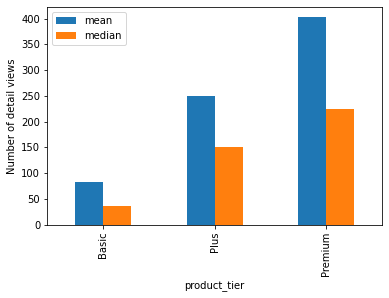

In [80]:
df1.groupby("product_tier")['detail_views'].agg(['mean','median']).plot(kind='bar',label=True,ylabel="Number of detail views")

In [81]:
df1.groupby("product_tier")['detail_views'].agg(['mean','median', 'max', 'min', 'count', 'std'])

,mean,median,max,min,count,std
product_tier,,,,,,
Basic,82.626728,35.0,12925.0,0.0,75216,194.408981
Plus,248.727431,151.0,2385.0,1.0,576,288.084451
Premium,402.138985,224.0,13926.0,1.0,2324,612.874089


         Stats_Basic   Stats_Plus  Stats_Premium
count   75216.000000   576.000000    2324.000000
mean       82.626728   248.727431     402.138985
std       194.408981   288.084451     612.874089
min         0.000000     1.000000       1.000000
25%        12.000000    67.000000      90.000000
50%        35.000000   151.000000     224.000000
75%        87.000000   323.250000     487.000000
max     12925.000000  2385.000000   13926.000000
median     35.000000   151.000000     224.000000


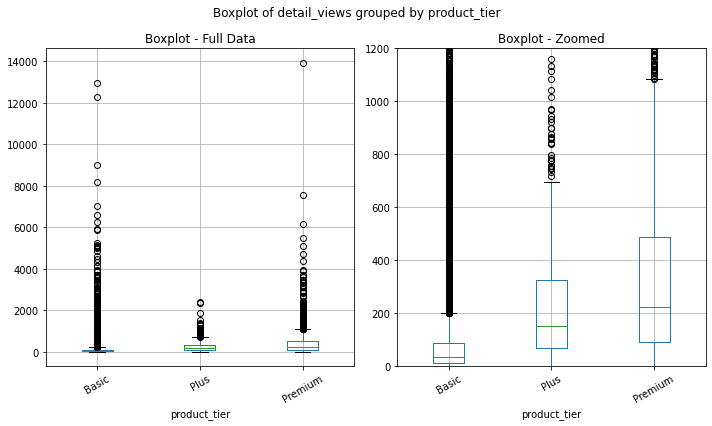

In [82]:
df_dv_vs_prodTier = make_combined_describe_stats(df, _which_col='detail_views')
print(df_dv_vs_prodTier)

## show side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
df.boxplot('detail_views','product_tier',rot = 30, ax=axes[0])
df.boxplot('detail_views','product_tier',rot = 30, ax=axes[1]).set_ylim(0.0, 1200.0)
fig.suptitle('Boxplot of detail_views grouped by product_tier')
axes[0].title.set_text('Boxplot - Full Data')
axes[1].title.set_text('Boxplot - Zoomed')
fig.tight_layout()

### ctr vs product_tier

Observations from box plot and the descriptive stats.

Mean - values NOT as expected
Lowest for Premium (0.035770), higher for Plus (0.040991), highest for Basic (0.047252)
Basic:Plus:Premium = 1 : 0.86 : 0.75

Median - values NOT as expected
Lowest for Premium (0.031156), higher for Plus (0.037472), highest for Basic (0.038560)
Basic:Plus:Premium = 1 : 0.97 : 0.80

For higher category, the mean and the median for ctr decreased.
Expected values to increase!
The mean for Premium is 0.75 times mean for Basic.
The median for Premium is 0.80 times median for Basic.

<AxesSubplot:xlabel='product_tier', ylabel='Number of ctr'>

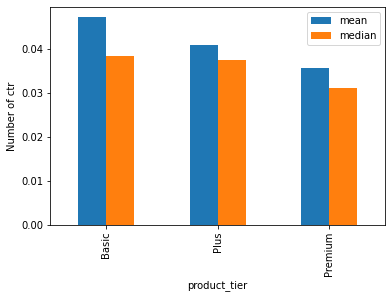

In [83]:
df1.groupby("product_tier")['ctr'].agg(['mean','median']).plot(kind='bar',label=True,ylabel="Number of ctr")

In [84]:
df1.groupby("product_tier")['ctr'].agg(['mean','median', 'max', 'min', 'count', 'std'])

,mean,median,max,min,count,std
product_tier,,,,,,
Basic,0.047252,0.038560,1.000000,0.000000,75216,0.038458
Plus,0.040991,0.037472,0.158983,0.002584,576,0.020603
Premium,0.035770,0.031156,0.524249,0.001873,2324,0.022691


         Stats_Basic  Stats_Plus  Stats_Premium
count   75216.000000  576.000000    2324.000000
mean        0.047252    0.040991       0.035770
std         0.038458    0.020603       0.022691
min         0.000000    0.002584       0.001873
25%         0.024339    0.026667       0.022441
50%         0.038560    0.037472       0.031156
75%         0.059269    0.049293       0.043478
max         1.000000    0.158983       0.524249
median      0.038560    0.037472       0.031156


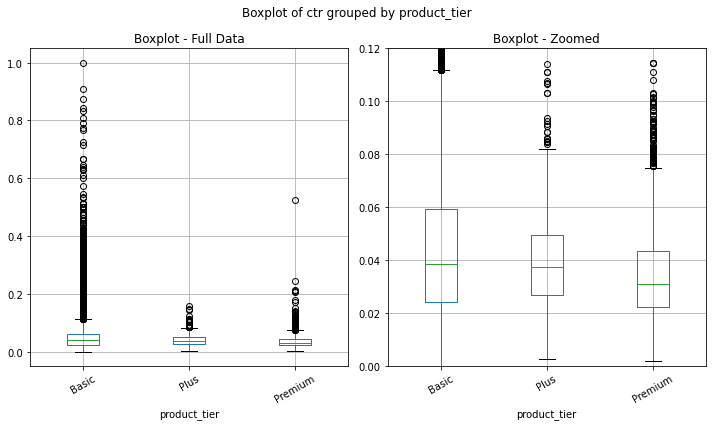

In [85]:
df_ctr_vs_prodTier = make_combined_describe_stats(df, _which_col='ctr')
print(df_ctr_vs_prodTier)

## show side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
df.boxplot('ctr','product_tier',rot = 30, ax=axes[0])
df.boxplot('ctr','product_tier',rot = 30, ax=axes[1]).set_ylim(0.0, 0.12)
fig.suptitle('Boxplot of ctr grouped by product_tier')
axes[0].title.set_text('Boxplot - Full Data')
axes[1].title.set_text('Boxplot - Zoomed')
fig.tight_layout()

# stock_days vs product_tier

Observations from box plot and the descriptive stats.

Mean - values NOT FULLY as expected
Lowest for Premium (33.47), higher for Plus (38.86), but lower for Basic (36.05)
Basic:Plus:Premium = 1 : 1.07 : 0.92

Median - values as expected
Highest for Premium (23), lower for Plus (29), lowest for Basic (25)
Basic:Plus:Premium = 1 : 1.16 : 0.92

For higher category, the mean and the median for ctr decreased.
The mean for Premium is 0.92 times mean for Basic.
The median for Premium is 0.92 times median for Basic.
But suprisingly, the values are higher for Plus compared to Basic.

<AxesSubplot:xlabel='product_tier', ylabel='Number of stock_days'>

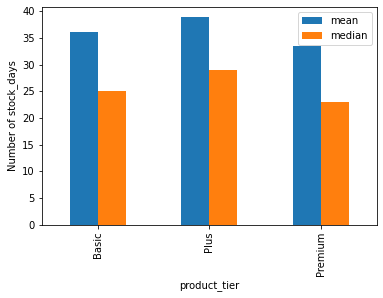

In [86]:
df1.groupby("product_tier")['stock_days'].agg(['mean','median']).plot(kind='bar',label=True,ylabel="Number of stock_days")

In [87]:
df1.groupby("product_tier")['stock_days'].agg(['mean','median', 'max', 'min', 'count', 'std'])

,mean,median,max,min,count,std
product_tier,,,,,,
Basic,36.055773,25,127,0,75216,32.242210
Plus,38.859375,29,126,0,576,33.178244
Premium,33.472031,23,125,0,2324,29.815917


         Stats_Basic  Stats_Plus  Stats_Premium
count   75216.000000  576.000000    2324.000000
mean       36.055773   38.859375      33.472031
std        32.242210   33.178244      29.815917
min         0.000000    0.000000       0.000000
25%        10.000000   12.000000      10.000000
50%        25.000000   29.000000      23.000000
75%        55.000000   58.000000      49.000000
max       127.000000  126.000000     125.000000
median     25.000000   29.000000      23.000000


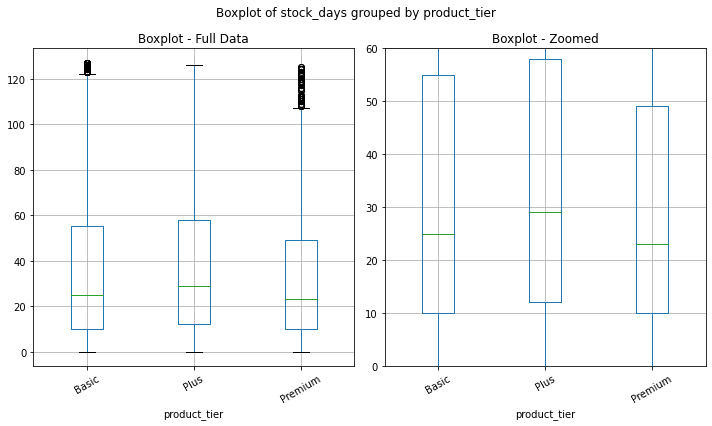

In [88]:
df_stockdays_vs_prodTier = make_combined_describe_stats(df, _which_col='stock_days')
print(df_stockdays_vs_prodTier)

## show side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
df.boxplot('stock_days','product_tier',rot = 30, ax=axes[0])
df.boxplot('stock_days','product_tier',rot = 30, ax=axes[1]).set_ylim(0.0, 60.0)
fig.suptitle('Boxplot of stock_days grouped by product_tier')
axes[0].title.set_text('Boxplot - Full Data')
axes[1].title.set_text('Boxplot - Zoomed')
fig.tight_layout()

In [89]:
del df1

# Modelling with Linear Regression

using Scikit-learn and Statsmodels

Scikit-learn example:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
linear_model.LinearRegression.score can also be used to estimate R2 coefficient value - gives the same results as with sklearn.metrics.r2_score.

Statsmodels examples:

https://www.reneshbedre.com/blog/multiple-linear-regression.html

https://datatofish.com/statsmodels-linear-regression/

https://levelup.gitconnected.com/an-introduction-to-regression-in-python-with-statsmodels-and-scikit-learn-9f75c748f56e

Modeling with Simple and Multi linear regression.
Predicting the stock_days using different parameters like:
product_tier, price, search_views, detail_views, ctr

In [90]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse as sm_rmse

In [91]:
dflr = df.copy()

In [92]:
dflr.columns

Index(['trk', 'article_id', 'product_tier', 'make_name', 'price',
       'first_zip_digit', 'first_registration_year', 'created_date',
       'deleted_date', 'search_views', 'detail_views', 'stock_days', 'ctr',
       'cr_dt', 'de_dt'],
      dtype='object')

In [93]:
dflr.dtypes

trk                                 int64
article_id                          int64
product_tier                       object
make_name                          object
price                               int64
first_zip_digit                     int64
first_registration_year             int64
created_date                       object
deleted_date                       object
search_views                      float64
detail_views                      float64
stock_days                          int64
ctr                               float64
cr_dt                      datetime64[ns]
de_dt                      datetime64[ns]
dtype: object

In [94]:
dflr[50:55]

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt
60409,60409,347246825,Basic,MINI,5895,1,2007,04.07.18,13.07.18,543.0,115.0,9,0.211786,2018-07-04,2018-07-13
64749,64749,347246832,Premium,Nissan,12450,2,2008,04.07.18,28.07.18,5125.0,140.0,24,0.027317,2018-07-04,2018-07-28
14736,14736,347246833,Basic,Nissan,24950,2,2015,04.07.18,23.10.18,1529.0,172.0,111,0.112492,2018-07-04,2018-10-23
51519,51519,347246834,Basic,Nissan,25950,2,2015,04.07.18,27.07.18,251.0,6.0,23,0.023904,2018-07-04,2018-07-27
6803,6803,347246836,Basic,Nissan,29950,2,2017,04.07.18,02.08.18,140.0,6.0,29,0.042857,2018-07-04,2018-08-02


Creating columns for One-hot encdoing of product_tier

In [95]:
# One-hot encdoing: Using pandas dummies values approach: i.e. pd.get_dummies

# generate binary values using get_dummies
dum_df = pd.get_dummies(dflr[['product_tier']], columns=['product_tier'], prefix=['prod_tier_type_is'] )
dum_df[50:55]

,prod_tier_type_is_Basic,prod_tier_type_is_Plus,prod_tier_type_is_Premium
60409,1,0,0
64749,0,0,1
14736,1,0,0
51519,1,0,0
6803,1,0,0


In [96]:
# merge with main df bridge_df on key values
dflr = dflr.join(dum_df)
dflr[50:55]

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt,prod_tier_type_is_Basic,prod_tier_type_is_Plus,prod_tier_type_is_Premium
60409,60409,347246825,Basic,MINI,5895,1,2007,04.07.18,13.07.18,543.0,115.0,9,0.211786,2018-07-04,2018-07-13,1,0,0
64749,64749,347246832,Premium,Nissan,12450,2,2008,04.07.18,28.07.18,5125.0,140.0,24,0.027317,2018-07-04,2018-07-28,0,0,1
14736,14736,347246833,Basic,Nissan,24950,2,2015,04.07.18,23.10.18,1529.0,172.0,111,0.112492,2018-07-04,2018-10-23,1,0,0
51519,51519,347246834,Basic,Nissan,25950,2,2015,04.07.18,27.07.18,251.0,6.0,23,0.023904,2018-07-04,2018-07-27,1,0,0
6803,6803,347246836,Basic,Nissan,29950,2,2017,04.07.18,02.08.18,140.0,6.0,29,0.042857,2018-07-04,2018-08-02,1,0,0


Creating new column for product_tier where string replaced with numbers

0 for Basic
1 for Plus
2 for Premium

In [97]:
dflr.head(3)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt,prod_tier_type_is_Basic,prod_tier_type_is_Plus,prod_tier_type_is_Premium
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074,2018-07-04,2018-07-13,1,0,0
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408,2018-07-04,2018-08-14,1,0,0
45555,45555,347232416,Basic,Mercedes-Benz,16950,7,2013,04.07.18,15.09.18,1564.0,118.0,74,0.075448,2018-07-04,2018-09-15,1,0,0


In [98]:
dflr['product_tier_as_number'] = dflr['product_tier']

In [99]:
dflr.head(3)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt,prod_tier_type_is_Basic,prod_tier_type_is_Plus,prod_tier_type_is_Premium,product_tier_as_number
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074,2018-07-04,2018-07-13,1,0,0,Basic
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408,2018-07-04,2018-08-14,1,0,0,Basic
45555,45555,347232416,Basic,Mercedes-Benz,16950,7,2013,04.07.18,15.09.18,1564.0,118.0,74,0.075448,2018-07-04,2018-09-15,1,0,0,Basic


In [100]:
dflr['product_tier_as_number'].replace(
    to_replace={'Basic': 0, 'Plus': 1, 'Premium': 2},
    inplace=True
)
dflr.head(3)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt,prod_tier_type_is_Basic,prod_tier_type_is_Plus,prod_tier_type_is_Premium,product_tier_as_number
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074,2018-07-04,2018-07-13,1,0,0,0
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408,2018-07-04,2018-08-14,1,0,0,0
45555,45555,347232416,Basic,Mercedes-Benz,16950,7,2013,04.07.18,15.09.18,1564.0,118.0,74,0.075448,2018-07-04,2018-09-15,1,0,0,0


Creating columns for age of the vehicle

In [101]:
dflr['veh_age'] =2018 - dflr['first_registration_year']
dflr.head(3)

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt,prod_tier_type_is_Basic,prod_tier_type_is_Plus,prod_tier_type_is_Premium,product_tier_as_number,veh_age
38868,38868,347232386,Basic,Nissan,6850,7,2005,04.07.18,13.07.18,297.0,22.0,9,0.074074,2018-07-04,2018-07-13,1,0,0,0,13
29915,29915,347232409,Basic,Peugeot,850,5,2004,04.07.18,14.08.18,3920.0,276.0,41,0.070408,2018-07-04,2018-08-14,1,0,0,0,14
45555,45555,347232416,Basic,Mercedes-Benz,16950,7,2013,04.07.18,15.09.18,1564.0,118.0,74,0.075448,2018-07-04,2018-09-15,1,0,0,0,5


In [102]:
dflr.dtypes

trk                                   int64
article_id                            int64
product_tier                         object
make_name                            object
price                                 int64
first_zip_digit                       int64
first_registration_year               int64
created_date                         object
deleted_date                         object
search_views                        float64
detail_views                        float64
stock_days                            int64
ctr                                 float64
cr_dt                        datetime64[ns]
de_dt                        datetime64[ns]
prod_tier_type_is_Basic               uint8
prod_tier_type_is_Plus                uint8
prod_tier_type_is_Premium             uint8
product_tier_as_number                int64
veh_age                               int64
dtype: object

In [103]:
#dflr['stock_days'] = dflr['stock_days'].astype(int)
#dflr.dtypes

# Aside 1 - START

## categorical features pre-precessing examples

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

Using category codes approach:

In [104]:
# import required libraries
import pandas as pd
import numpy as np
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


In [105]:
# converting type of columns to 'category'
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


In [106]:
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


#### Using sci-kit learn library approach:

In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


In [108]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [109]:
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


One-hot encdoing: Using pandas dummies values approach: i.e. pd.get_dummies

In [110]:
import pandas as pd
import numpy as np
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


In [111]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(bridge_df, columns=["Bridge_Types"], prefix=["Type_is"] )
dum_df

,Type_is_Arch,Type_is_Beam,Type_is_Cable,Type_is_Cantilever,Type_is_Suspension,Type_is_Tied Arch,Type_is_Truss
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0


In [112]:
# merge with main df bridge_df on key values
bridge_df = bridge_df.join(dum_df)
bridge_df

,Bridge_Types,Type_is_Arch,Type_is_Beam,Type_is_Cable,Type_is_Cantilever,Type_is_Suspension,Type_is_Tied Arch,Type_is_Truss
0,Arch,1,0,0,0,0,0,0
1,Beam,0,1,0,0,0,0,0
2,Truss,0,0,0,0,0,0,1
3,Cantilever,0,0,0,1,0,0,0
4,Tied Arch,0,0,0,0,0,1,0
5,Suspension,0,0,0,0,1,0,0
6,Cable,0,0,1,0,0,0,0


One-Hot Encoder: Using sci-kit learn library approach:

OneHotEncoder from SciKit library only takes numerical categorical values, hence any value of string type should be label encoded before one hot encoded. So taking the dataframe from the previous example, we will apply OneHotEncoder on column Bridge_Types_Cat.

In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
bridge_df

,Bridge_Types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


In [114]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


In [115]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())
enc_df

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [116]:
# merge with main df bridge_df on key values
bridge_df = bridge_df.join(enc_df)
bridge_df

,Bridge_Types,Bridge_Types_Cat,0,1,2,3,4,5,6
0,Arch,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beam,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Truss,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cantilever,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Tied Arch,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Suspension,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Cable,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Back to coding

1-hot coding for product_tier

In [117]:
dflr[50:55]

,trk,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cr_dt,de_dt,prod_tier_type_is_Basic,prod_tier_type_is_Plus,prod_tier_type_is_Premium,product_tier_as_number,veh_age
60409,60409,347246825,Basic,MINI,5895,1,2007,04.07.18,13.07.18,543.0,115.0,9,0.211786,2018-07-04,2018-07-13,1,0,0,0,11
64749,64749,347246832,Premium,Nissan,12450,2,2008,04.07.18,28.07.18,5125.0,140.0,24,0.027317,2018-07-04,2018-07-28,0,0,1,2,10
14736,14736,347246833,Basic,Nissan,24950,2,2015,04.07.18,23.10.18,1529.0,172.0,111,0.112492,2018-07-04,2018-10-23,1,0,0,0,3
51519,51519,347246834,Basic,Nissan,25950,2,2015,04.07.18,27.07.18,251.0,6.0,23,0.023904,2018-07-04,2018-07-27,1,0,0,0,3
6803,6803,347246836,Basic,Nissan,29950,2,2017,04.07.18,02.08.18,140.0,6.0,29,0.042857,2018-07-04,2018-08-02,1,0,0,0,1


## Model 1 uses only product_tier_as_number for the independent variable, NOT the one-hot coding variables

## Model 2 uses other variables than product_tier as Model 1 has poor results

product_tier = product_tier_as_number

Basic = 0 , Plus = 1 , Premium = 2

## Model 1: stock_days = f(product_tier_as_number)

### Using Scikit-learn

Coefficients = [[-1.06370501]]

Intercept = [36.05889599]

Mean Squared Error (MSE TRAIN) = 1034.81

Coefficient of determination (R2 score TRAIN) = 0.000134

Mean Squared Error (MSE TEST) = 1042.84

Coefficient of determination (R2 score TEST) = 0.000107

Observations

Terrible results with R2 score = 0 - basically useless model

stock_days = -1.063705 * product_tier_as_number + 36.05889599

where stock_days = 0, 1, 2 means Basic, Plus, Premium respectively

stock_days is HARDLY affected by product_tier_as_number

But, as expected the -ve beta for product_tier_as_number means as we move from Basic to Plus to Premium, the stock_days reduces.

In [118]:
X_set_1 = ['product_tier_as_number']

In [119]:
lrSkModel1 = linear_model.LinearRegression()

In [120]:
for col in X_set_1:
    print(f"{col} : {dflr[col].isnull().sum()}")

product_tier_as_number : 0


In [121]:
X, y = dflr[X_set_1].to_numpy(), dflr[['stock_days']].to_numpy()

In [122]:
print(np.any(np.isnan(X)))      ## expecting False
print(np.all(np.isfinite(X)))   ## expecting True
print(np.any(np.isnan(y)))      ## expecting False
print(np.all(np.isfinite(y)))   ## expecting True

False
True
False
True


In [123]:
X[np.argwhere(np.isnan(X))]

array([], shape=(0, 2, 1), dtype=int64)

In [124]:
y[np.argwhere(np.isnan(y))]

array([], shape=(0, 2, 1), dtype=int64)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=444)

In [126]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(78116, 1)
(70304, 1)
(7812, 1)
(78116, 1)
(70304, 1)
(7812, 1)


In [127]:
lrSkModel1.fit(X_train, y_train)

LinearRegression()

In [128]:
y_train_preds = lrSkModel1.predict(X_train)
y_test_preds = lrSkModel1.predict(X_test)

In [129]:
sk_mse_model_1_train = mean_squared_error(y_train, y_train_preds)
sk_rmse_model_1_train = mean_squared_error(y_train, y_train_preds, squared=False)
sk_r2_model_1_train = r2_score(y_train, y_train_preds)

sk_mse_model_1_test = mean_squared_error(y_test, y_test_preds)
sk_rmse_model_1_test = mean_squared_error(y_test, y_test_preds, squared=False)
sk_r2_model_1_test = r2_score(y_test, y_test_preds)

In [130]:
print(f"Model 1: Information.")
print(f"Coefficients = {lrSkModel1.coef_}")
print(f"Intercept = {lrSkModel1.intercept_}")
print(f"")
print(f"Mean Squared Error (MSE TRAIN) = {sk_mse_model_1_train:.2f}")
print(f"Root Mean Squared Error (RMSE TRAIN) = {sk_rmse_model_1_train:.2f}")
print(f"Coefficient of determination (R2 score TRAIN) = {sk_r2_model_1_train:.6f}")
print(f"")
print(f"Mean Squared Error (MSE TEST) = {sk_mse_model_1_test:.2f}")
print(f"Root Mean Squared Error (RMSE TEST) = {sk_rmse_model_1_test:.2f}")
print(f"Coefficient of determination (R2 score TEST) = {sk_r2_model_1_test:.6f}")

Model 1: Information.
Coefficients = [[-1.06370501]]
Intercept = [36.05889599]

Mean Squared Error (MSE TRAIN) = 1034.81
Root Mean Squared Error (RMSE TRAIN) = 32.17
Coefficient of determination (R2 score TRAIN) = 0.000134

Mean Squared Error (MSE TEST) = 1042.84
Root Mean Squared Error (RMSE TEST) = 32.29
Coefficient of determination (R2 score TEST) = 0.000107


In [131]:
for o, p in zip(y_train[:5], y_train_preds[:5]):
    print(o, p)
print(f"")
for o, p in zip(y_test[:5], y_test_preds[:5]):
    print(o, p)

[25] [36.05889599]
[45] [36.05889599]
[78] [36.05889599]
[71] [36.05889599]
[2] [36.05889599]

[31] [36.05889599]
[39] [36.05889599]
[79] [36.05889599]
[72] [36.05889599]
[22] [36.05889599]


In [132]:
lrSkModel1.score(X_train, y_train)

0.00013370730784301177

In [133]:
lrSkModel1.score(X_test, y_test)

0.00010700302211064106

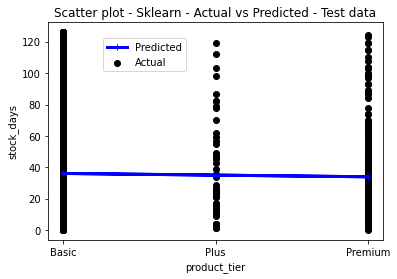

In [134]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black', label='Actual')
plt.plot(X_test, y_test_preds, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks(np.arange(3), ('Basic', 'Plus', 'Premium'))
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted - Test data')
plt.xlabel('product_tier')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

### using Statsmodels

Observations

parameters = [36.05889599 -1.06370501]

pvalues = [0.         0.00216932]

tvalues = [291.88448584  -3.06612918]

rsquared = 0.00013370730784323381

rsquared_adj = 0.00011948486335111586

R2 score matches the R2 score from scikit-learn.

Adjusted R2 score = 0.00012 - basically useless model

stock_days = -1.0637 * product_tier + 36.0589

where stock_days = 0, 1, 2 means Basic, Plus, Premium respectively

stock_days is HARDLY affected by product_tier_as_number

But, as expected the -ve beta for product_tier_as_number means as we move from Basic to Plus to Premium, the stock_days reduces.

same beta and intercept as from scikit-learn

In [135]:
X_set_1 = ['product_tier_as_number']

In [136]:
for col in X_set_1:
    print(f"{col} : {dflr[col].isnull().sum()}")

product_tier_as_number : 0


In [137]:
X, y = dflr[X_set_1].to_numpy(), dflr[['stock_days']].to_numpy()

In [138]:
print(np.any(np.isnan(X)))      ## expecting False
print(np.all(np.isfinite(X)))   ## expecting True
print(np.any(np.isnan(y)))      ## expecting False
print(np.all(np.isfinite(y)))   ## expecting True

False
True
False
True


In [139]:
X[np.argwhere(np.isnan(X))]

array([], shape=(0, 2, 1), dtype=int64)

In [140]:
y[np.argwhere(np.isnan(y))]

array([], shape=(0, 2, 1), dtype=int64)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=444)

In [142]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(78116, 1)
(70304, 1)
(7812, 1)
(78116, 1)
(70304, 1)
(7812, 1)


In [143]:
X_train_sm = sm.add_constant(X_train) # adding a constant
print(type(X_train_sm))
print(X_train_sm.shape, X_train.shape)
print(f"")
X_test_sm = sm.add_constant(X_test) # adding a constant
print(X_test_sm.shape, X_test.shape)

<class 'numpy.ndarray'>
(70304, 2) (70304, 1)

(7812, 2) (7812, 1)


In [144]:
lrStatsModel1 = sm.OLS(y_train, X_train_sm).fit()

In [145]:
lrStatsModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.401
Date:                Mon, 10 May 2021   Prob (F-statistic):            0.00217
Time:                        02:33:19   Log-Likelihood:            -3.4378e+05
No. Observations:               70304   AIC:                         6.876e+05
Df Residuals:                   70302   BIC:                         6.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0589      0.124    291.884      0.000      35.817      36.301
x1            -1.0637      0.347     -3.066      0.002      -1.744      -0.384
==============================================================================
Omnibus:                     8264.389   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11616.810
Skew:                           0.996   Prob(JB):                         0.00
Kurtosis:                       3.022   Cond. No.                         2.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
print(f"parameters = {lrStatsModel1.params}")
print(f"\npvalues = {lrStatsModel1.pvalues}")
print(f"\ntvalues = {lrStatsModel1.tvalues}")
print(f"\nrsquared = {lrStatsModel1.rsquared}")
print(f"\nrsquared_adj = {lrStatsModel1.rsquared_adj}")

parameters = [36.05889599 -1.06370501]

pvalues = [0.         0.00216932]

tvalues = [291.88448584  -3.06612918]

rsquared = 0.00013370730784323381

rsquared_adj = 0.00011948486335111586


In [147]:
y_train_preds = lrStatsModel1.predict(X_train_sm)
y_test_preds = lrStatsModel1.predict(X_test_sm)

print(y_train_preds, y_train_preds.shape)
print(f"")
print(y_test_preds, y_test_preds.shape)

[36.05889599 36.05889599 36.05889599 ... 36.05889599 36.05889599
 36.05889599] (70304,)

[36.05889599 36.05889599 36.05889599 ... 36.05889599 33.93148597
 36.05889599] (7812,)


In [148]:
#sm_rmse_model_1_train = sm_rmse(x1=y_train, x2=y_train_preds)
#print(f"sm_rmse_model_1_train =\n{sm_rmse_model_1_train}")
sm_rmse_model_1_test = sm_rmse(x1=y_test, x2=y_test_preds)
print(f"sm_rmse_model_1_test =\n{sm_rmse_model_1_test}")

sm_rmse_model_1_test =
[32.29478011 32.29478011 32.29478011 ... 32.29478011 32.36802248
 32.29478011]


In [149]:
lrStatsModel1.resid

array([-11.05889599,   8.94110401,  41.94110401, ...,  75.94110401,
        -3.05889599, -35.05889599])

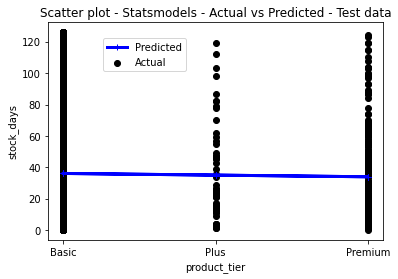

In [150]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black', label='Actual')
plt.plot(X_test, y_test_preds, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks(np.arange(3), ('Basic', 'Plus', 'Premium'))
plt.yticks()

plt.title('Scatter plot - Statsmodels - Actual vs Predicted - Test data')
plt.xlabel('product_tier')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

## Model 2: stock_days = f(price, search_views, ctr)

### scikit-learn

Observations:

Model 2: Information.

Coefficients = [[ 1.64906755e-04  1.34024844e-03 -1.13770502e+02]]

Intercept = [35.7690886]

Mean Squared Error (MSE TRAIN) = 933.08

Coefficient of determination (R2 score TRAIN) = 0.098425

Mean Squared Error (MSE TEST) = 929.57

Coefficient of determination (R2 score TEST) = 0.108707


stock_days = 0.0001649 * price + 0.00134025 * search_view - 113.770502 * ctr + 35.7690886

Very Poor model - only 9.8% variation explained. for the Train data

In [151]:
lrSkModel2 = linear_model.LinearRegression()

In [152]:
X_set_2 = ['price', 'search_views', 'ctr']

In [153]:
for col in X_set_2:
    print(f"{col} : {dflr[col].isnull().sum()}")

price : 0
search_views : 0
ctr : 0


In [154]:
X, y = dflr[X_set_2].to_numpy(), dflr[['stock_days']].to_numpy()

In [155]:
X[np.argwhere(np.isnan(X))]

array([], shape=(0, 2, 3), dtype=float64)

In [156]:
y[np.argwhere(np.isnan(y))]

array([], shape=(0, 2, 1), dtype=int64)

In [157]:
print(np.any(np.isnan(X)))      ## expecting False
print(np.all(np.isfinite(X)))   ## expecting True
print(np.any(np.isnan(y)))      ## expecting False
print(np.all(np.isfinite(y)))   ## expecting True

False
True
False
True


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=444)

In [159]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(78116, 3)
(70304, 3)
(7812, 3)
(78116, 1)
(70304, 1)
(7812, 1)


In [160]:
lrSkModel2.fit(X_train, y_train)

LinearRegression()

In [161]:
y_train_preds = lrSkModel2.predict(X_train)
y_test_preds = lrSkModel2.predict(X_test)

print(y_train_preds, y_train_preds.shape)
print(f"")
print(y_test_preds, y_test_preds.shape)

[[32.86208589]
 [39.14912413]
 [37.82334415]
 ...
 [39.91952467]
 [43.15885178]
 [32.90945333]] (70304, 1)

[[37.99780552]
 [38.20315685]
 [38.79320544]
 ...
 [36.7200354 ]
 [37.15596608]
 [27.57225987]] (7812, 1)


In [162]:
sk_mse_model_2_train = mean_squared_error(y_train, y_train_preds)
sk_rmse_model_2_train = mean_squared_error(y_train, y_train_preds, squared=False)
sk_r2_model_2_train = r2_score(y_train, y_train_preds)

sk_mse_model_2_test = mean_squared_error(y_test, y_test_preds)
sk_rmse_model_2_test = mean_squared_error(y_test, y_test_preds, squared=False)
sk_r2_model_2_test = r2_score(y_test, y_test_preds)

In [163]:
print(f"Model 2: Information.")
print(f"Coefficients = {lrSkModel2.coef_}")
print(f"Intercept = {lrSkModel2.intercept_}")
print(f"")
print(f"Mean Squared Error (MSE TRAIN) = {sk_mse_model_2_train:.2f}")
print(f"Root Mean Squared Error (RMSE TRAIN) = {sk_rmse_model_2_train:.2f}")
print(f"Coefficient of determination (R2 score TRAIN) = {sk_r2_model_2_train:.6f}")
print(f"")
print(f"Mean Squared Error (MSE TEST) = {sk_mse_model_2_test:.2f}")
print(f"Root Mean Squared Error (RMSE TEST) = {sk_rmse_model_2_test:.2f}")
print(f"Coefficient of determination (R2 score TEST) = {sk_r2_model_2_test:.6f}")

Model 2: Information.
Coefficients = [[ 1.64906755e-04  1.34024844e-03 -1.13770502e+02]]
Intercept = [35.7690886]

Mean Squared Error (MSE TRAIN) = 933.08
Root Mean Squared Error (RMSE TRAIN) = 30.55
Coefficient of determination (R2 score TRAIN) = 0.098425

Mean Squared Error (MSE TEST) = 929.57
Root Mean Squared Error (RMSE TEST) = 30.49
Coefficient of determination (R2 score TEST) = 0.108707


In [164]:
for o, p in zip(y_test[:5], y_test_preds[:5]):
    print(o, p)

[31] [37.99780552]
[39] [38.20315685]
[79] [38.79320544]
[72] [34.21608195]
[22] [28.81022069]


In [165]:
lrSkModel2.score(X_train, y_train)

0.09842473360026371

In [166]:
lrSkModel2.score(X_test, y_test)

0.10870669168092051

In [167]:
X_test.shape

(7812, 3)

In [168]:
X_test[:10,0]

array([ 3750., 24940., 22700.,  8800.,  2450.,  3599., 10790., 19925.,
       13450., 14400.])

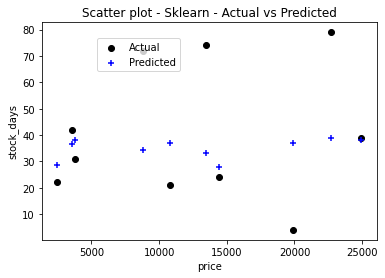

In [169]:
# Plot outputs

## stock_days vs price
X_arr_idx = X_set_2.index('price')
plt.scatter(X_test[:10, X_arr_idx], y_test[:10],  color='black', label='Actual')
#plt.plot(X_test[:10, X_arr_idx], y_test_preds[:10], color='blue', linewidth=3, label='Predicted')
plt.scatter(X_test[:10, X_arr_idx], y_test_preds[:10],  color='blue', label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted')
plt.xlabel('price')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

In [170]:
abc = np.array([30, 20, 50, 100])
rordidx = np.argsort(abc)
abc1 = abc[rordidx]
abc[2] = 5000
print(abc)
print(abc1)
print(f"")
abc = np.array([30, 20, 50, 100])
np.sort(abc)
print(abc)
print(type(abc))
print(type(abc.tolist()))

[  30   20 5000  100]
[ 20  30  50 100]

[ 30  20  50 100]
<class 'numpy.ndarray'>
<class 'list'>


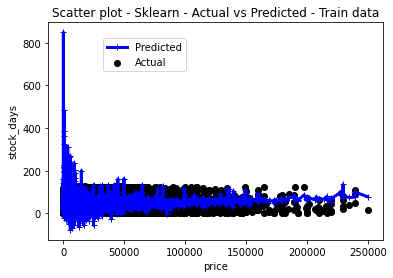

In [171]:
# Plot outputs

## stock_days vs price
X_arr_idx = X_set_2.index('price')

X_train_sort_idx = np.argsort(np.array(X_train[:, X_arr_idx]))
X_train_sorted = np.sort(np.array(X_train[:, X_arr_idx])).tolist()
y_train_sorted = np.array(y_train)[X_train_sort_idx].tolist()
y_train_preds_sorted = np.array(y_train_preds)[X_train_sort_idx].tolist()

plt.scatter(X_train_sorted, y_train_sorted,  color='black', label='Actual')
plt.plot(X_train_sorted, y_train_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted - Train data')
plt.xlabel('price')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

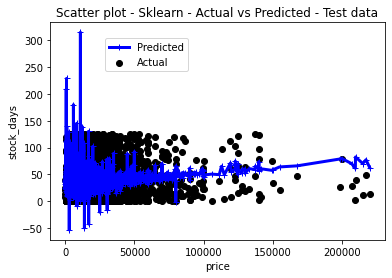

In [172]:
# Plot outputs

## stock_days vs price
X_arr_idx = X_set_2.index('price')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted - Test data')
plt.xlabel('price')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

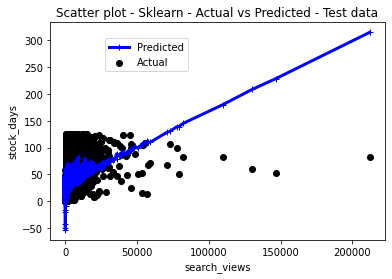

In [173]:
# Plot outputs

## stock_days vs price
X_arr_idx = X_set_2.index('search_views')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted - Test data')
plt.xlabel('search_views')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

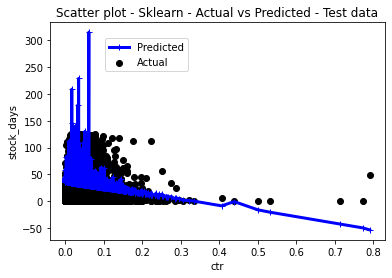

In [174]:
# Plot outputs

## stock_days vs ctr
X_arr_idx = X_set_2.index('ctr')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted - Test data')
plt.xlabel('ctr')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

### using Statsmodels

Observations

R2 score matches the R2 score from scikit-learn.

Adjusted R2 score = 0.0983

Slightly better than model_1 but still very poor model as only 9.83% variation explained for Train data.

stock_days = 0.0001649 * price + 0.00134025 * search_views - 113.7705 * ctr + 35.7691
stock_days is NOT affected too much by combination of [price, search_views, ctr].

parameters = [ 3.57690886e+01  1.64906755e-04  1.34024844e-03 -1.13770502e+02]

pvalues = [0.00000000e+000 1.17180894e-119 0.00000000e+000 1.17758666e-304]

tvalues = [164.91560883  23.30321991  73.37244224 -37.49446995]

rsquared = 0.09842473360026371

rsquared_adj = 0.0983862595490661

same beta and intercept as from scikit-learn

In [175]:
X_set_2 = ['price', 'search_views', 'ctr']

In [176]:
for col in X_set_2:
    print(f"{col} : {dflr[col].isnull().sum()}")

price : 0
search_views : 0
ctr : 0


In [177]:
X, y = dflr[X_set_2].to_numpy(), dflr[['stock_days']].to_numpy()

In [178]:
X[np.argwhere(np.isnan(X))]

array([], shape=(0, 2, 3), dtype=float64)

In [179]:
y[np.argwhere(np.isnan(y))]

array([], shape=(0, 2, 1), dtype=int64)

In [180]:
print(np.any(np.isnan(X)))      ## expecting False
print(np.all(np.isfinite(X)))   ## expecting True
print(np.any(np.isnan(y)))      ## expecting False
print(np.all(np.isfinite(y)))   ## expecting True

False
True
False
True


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=444)

In [182]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(78116, 3)
(70304, 3)
(7812, 3)
(78116, 1)
(70304, 1)
(7812, 1)


In [183]:
X_train_sm = sm.add_constant(X_train) # adding a constant
print(type(X_train_sm))
print(X_train_sm.shape, X_train.shape)
print(f"")
X_test_sm = sm.add_constant(X_test) # adding a constant
print(X_test_sm.shape, X_test.shape)

<class 'numpy.ndarray'>
(70304, 4) (70304, 3)

(7812, 4) (7812, 3)


In [184]:
lrStatsModel2 = sm.OLS(y_train, X_train_sm).fit()

In [185]:
lrStatsModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2558.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        02:33:23   Log-Likelihood:            -3.4014e+05
No. Observations:               70304   AIC:                         6.803e+05
Df Residuals:                   70300   BIC:                         6.803e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7691      0.217    164.916      0.000      35.344      36.194
x1             0.0002   7.08e-06     23.303      0.000       0.000       0.000
x2             0.0013   1.83e-05     73.372      0.000       0.001       0.001
x3          -113.7705      3.034    -37.494      0.000    -119.718    -107.823
==============================================================================
Omnibus:                    12977.537   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113845.287
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       9.101   Cond. No.                     5.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
print(f"parameters = {lrStatsModel2.params}")
print(f"\npvalues = {lrStatsModel2.pvalues}")
print(f"\ntvalues = {lrStatsModel2.tvalues}")
print(f"\nrsquared = {lrStatsModel2.rsquared}")
print(f"\nrsquared_adj = {lrStatsModel2.rsquared_adj}")

parameters = [ 3.57690886e+01  1.64906755e-04  1.34024844e-03 -1.13770502e+02]

pvalues = [0.00000000e+000 1.17180894e-119 0.00000000e+000 1.17758666e-304]

tvalues = [164.91560883  23.30321991  73.37244224 -37.49446995]

rsquared = 0.09842473360026371

rsquared_adj = 0.0983862595490661


In [187]:
y_train_preds = lrStatsModel2.predict(X_train_sm)
y_test_preds = lrStatsModel2.predict(X_test_sm)

print(y_train_preds, y_train_preds.shape)
print(f"")
print(y_test_preds, y_test_preds.shape)

[32.86208589 39.14912413 37.82334415 ... 39.91952467 43.15885178
 32.90945333] (70304,)

[37.99780552 38.20315685 38.79320544 ... 36.7200354  37.15596608
 27.57225987] (7812,)


In [188]:
#sm_rmse_model_2_train = sm_rmse(x1=y_train, x2=y_train_preds)
#print(f"sm_rmse_model_2_train =\n{sm_rmse_model_2_train}")
sm_rmse_model_2_test = sm_rmse(x1=y_test, x2=y_test_preds)
print(f"sm_rmse_model_2_test =\n{sm_rmse_model_2_test}")

sm_rmse_model_2_test =
[32.34997113 32.36261467 32.40615877 ... 32.30053573 32.31173156
 33.40380632]


In [189]:
lrStatsModel2.resid

array([ -7.86208589,   5.85087587,  40.17665585, ...,  72.08047533,
       -10.15885178, -31.90945333])

In [190]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(f"")
print(y.shape)
print(y_train.shape)
print(y_test.shape)
print(f"")
print(X_train_sm.shape, X_train.shape)
print(f"")
print(X_test_sm.shape, X_test.shape)

(78116, 3)
(70304, 3)
(7812, 3)

(78116, 1)
(70304, 1)
(7812, 1)

(70304, 4) (70304, 3)

(7812, 4) (7812, 3)


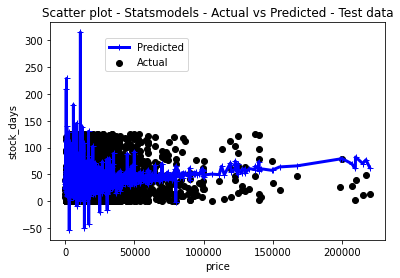

In [191]:
# Plot outputs

## stock_days vs price
X_arr_idx = X_set_2.index('price')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Statsmodels - Actual vs Predicted - Test data')
plt.xlabel('price')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

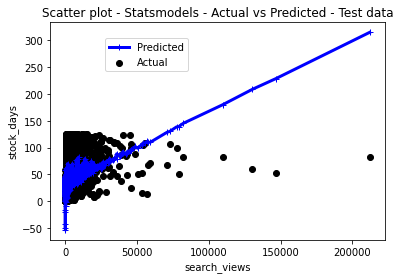

In [192]:
# Plot outputs

## stock_days vs search_views
X_arr_idx = X_set_2.index('search_views')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Statsmodels - Actual vs Predicted - Test data')
plt.xlabel('search_views')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

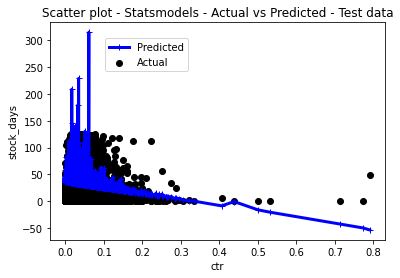

In [193]:
# Plot outputs

## stock_days vs ctr
X_arr_idx = X_set_2.index('ctr')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Statsmodels - Actual vs Predicted - Test data')
plt.xlabel('ctr')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

## Model 3 and Model 4 use one-hot coded features corresponding to product_tier in the independent variable, NOT the simple replacement of 0/ 1/ 2 for Basic/ Plus/ Premium

In [194]:
dflr.columns

Index(['trk', 'article_id', 'product_tier', 'make_name', 'price',
       'first_zip_digit', 'first_registration_year', 'created_date',
       'deleted_date', 'search_views', 'detail_views', 'stock_days', 'ctr',
       'cr_dt', 'de_dt', 'prod_tier_type_is_Basic', 'prod_tier_type_is_Plus',
       'prod_tier_type_is_Premium', 'product_tier_as_number', 'veh_age'],
      dtype='object')

## Model 3: stock_days = f(prod_tier_type_is_Basic, prod_tier_type_is_Plus, prod_tier_type_is_Premium)

### Using Scikit-learn

Coefficients = [[1.60640674e+13 1.60640674e+13 1.60640674e+13]]

Intercept = [-1.60640674e+13]

Mean Squared Error (MSE TRAIN) = 1034.68

Coefficient of determination (R2 score TRAIN) = 0.000255

Mean Squared Error (MSE TEST) = 1042.82

Coefficient of determination (R2 score TEST) = 0.000124

Observations

Terrible results with R2 score = 0 - basically useless model

stock_days = 1.60640674e+13 * product_tier_is_Basic + 1.60640674e+13 * product_tier_is_Plus + 1.60640674e+13 * product_tier_is_Premium - 1.60640674e+13

stock_days is NOT affected by product_tier - even after using one-hot coding approach the model is as poor

In [195]:
X_set_3 = ['prod_tier_type_is_Basic', 'prod_tier_type_is_Plus', 'prod_tier_type_is_Premium']

In [196]:
lrSkModel3 = linear_model.LinearRegression()

In [197]:
for col in X_set_3:
    print(f"{col} : {dflr[col].isnull().sum()}")

prod_tier_type_is_Basic : 0
prod_tier_type_is_Plus : 0
prod_tier_type_is_Premium : 0


In [198]:
X, y = dflr[X_set_3].to_numpy(), dflr[['stock_days']].to_numpy()

In [199]:
print(np.any(np.isnan(X)))      ## expecting False
print(np.all(np.isfinite(X)))   ## expecting True
print(np.any(np.isnan(y)))      ## expecting False
print(np.all(np.isfinite(y)))   ## expecting True

False
True
False
True


In [200]:
X[np.argwhere(np.isnan(X))]

array([], shape=(0, 2, 3), dtype=uint8)

In [201]:
y[np.argwhere(np.isnan(y))]

array([], shape=(0, 2, 1), dtype=int64)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=444)

In [203]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(78116, 3)
(70304, 3)
(7812, 3)
(78116, 1)
(70304, 1)
(7812, 1)


In [204]:
lrSkModel3.fit(X_train, y_train)

LinearRegression()

In [205]:
y_train_preds = lrSkModel3.predict(X_train)
y_test_preds = lrSkModel3.predict(X_test)

In [206]:
sk_mse_model_3_train = mean_squared_error(y_train, y_train_preds)
sk_rmse_model_3_train = mean_squared_error(y_train, y_train_preds, squared=False)
sk_r2_model_3_train = r2_score(y_train, y_train_preds)

sk_mse_model_3_test = mean_squared_error(y_test, y_test_preds)
sk_rmse_model_3_test = mean_squared_error(y_test, y_test_preds, squared=False)
sk_r2_model_3_test = r2_score(y_test, y_test_preds)

In [207]:
print(f"Model 3: Information.")
print(f"Coefficients = {lrSkModel3.coef_}")
print(f"Intercept = {lrSkModel3.intercept_}")
print(f"")
print(f"Mean Squared Error (MSE TRAIN) = {sk_mse_model_3_train:.2f}")
print(f"Root Mean Squared Error (RMSE TRAIN) = {sk_rmse_model_3_train:.2f}")
print(f"Coefficient of determination (R2 score TRAIN) = {sk_r2_model_3_train:.6f}")
print(f"")
print(f"Mean Squared Error (MSE TEST) = {sk_mse_model_3_test:.2f}")
print(f"Root Mean Squared Error (RMSE TEST) = {sk_rmse_model_3_test:.2f}")
print(f"Coefficient of determination (R2 score TEST) = {sk_r2_model_3_test:.6f}")

Model 3: Information.
Coefficients = [[1.60640674e+13 1.60640674e+13 1.60640674e+13]]
Intercept = [-1.60640674e+13]

Mean Squared Error (MSE TRAIN) = 1034.68
Root Mean Squared Error (RMSE TRAIN) = 32.17
Coefficient of determination (R2 score TRAIN) = 0.000255

Mean Squared Error (MSE TEST) = 1042.82
Root Mean Squared Error (RMSE TEST) = 32.29
Coefficient of determination (R2 score TEST) = 0.000124


In [208]:
for o, p in zip(y_train[:5], y_train_preds[:5]):
    print(o, p)
print(f"")
for o, p in zip(y_test[:5], y_test_preds[:5]):
    print(o, p)

[25] [36.05273438]
[45] [36.05273438]
[78] [36.05273438]
[71] [36.05273438]
[2] [36.05273438]

[31] [36.05273438]
[39] [36.05273438]
[79] [36.05273438]
[72] [36.05273438]
[22] [36.05273438]


In [209]:
lrSkModel3.score(X_train, y_train)

0.00025475394256324613

In [210]:
lrSkModel3.score(X_test, y_test)

0.00012404575078561741

In [211]:
print(X_test.shape)
print(y_test.shape)
print(y_test_preds.shape)

(7812, 3)
(7812, 1)
(7812, 1)


In [212]:
X_test[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [213]:
X_test_for_plotting = pd.DataFrame(X_test, columns=['hot1_basic', 'hot1_plus', 'hot1_premium'])
X_test_for_plotting

,hot1_basic,hot1_plus,hot1_premium
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7807,1,0,0
7808,1,0,0
7809,1,0,0
7810,0,0,1


In [214]:
X_test_for_plotting = pd.DataFrame(X_test, columns=['hot1_basic', 'hot1_plus', 'hot1_premium'])

X_test_for_plotting['hot1_comb_as_str'] = X_test_for_plotting['hot1_basic'].apply(str) +  \
X_test_for_plotting['hot1_plus'].apply(str) + \
X_test_for_plotting['hot1_premium'].apply(str)

X_test_for_plotting.drop(['hot1_basic', 'hot1_plus', 'hot1_premium'], axis=1, inplace=True)
X_test_for_plotting

,hot1_comb_as_str
0,100
1,100
2,100
3,100
4,100
...,...
7807,100
7808,100
7809,100
7810,001


In [215]:
X_test_for_plotting['prod_tier'] = X_test_for_plotting['hot1_comb_as_str'].apply(lambda v: {'100': 0, '010': 1, '001': 2}.get(v))
X_test_for_plotting

,hot1_comb_as_str,prod_tier
0,100,0
1,100,0
2,100,0
3,100,0
4,100,0
...,...,...
7807,100,0
7808,100,0
7809,100,0
7810,001,2


In [216]:
X_test_for_plotting.drop(['hot1_comb_as_str'], axis=1, inplace=True)
X_test_for_plotting

,prod_tier
0,0
1,0
2,0
3,0
4,0
...,...
7807,0
7808,0
7809,0
7810,2


In [217]:
dfabc = pd.DataFrame([[v1, v2] for v1, v2 in zip(list(range(1, 6)), list(range(50, 56)))], columns=['c1', 'c2'])

dfabc['new'] = dfabc[['c2']].apply(lambda x: x*2 if x.item()%2==0 else x, axis=1)
dfabc

,c1,c2,new
0,1,50,100
1,2,51,51
2,3,52,104
3,4,53,53
4,5,54,108


In [218]:
del dfabc

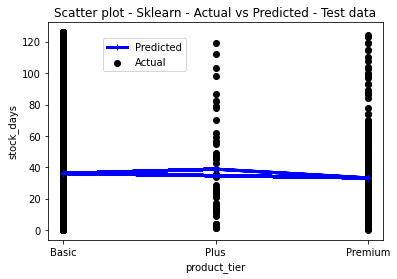

In [219]:
# Plot outputs
plt.scatter(X_test_for_plotting, y_test,  color='black', label='Actual')
plt.plot(X_test_for_plotting, y_test_preds, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks(np.arange(3), ('Basic', 'Plus', 'Premium'))
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted - Test data')
plt.xlabel('product_tier')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

### using Statsmodels

Observations

parameters = [ 6.47565787e+12 -6.47565787e+12 -6.47565787e+12 -6.47565787e+12]

pvalues = [0.73922075 0.73922075 0.73922075 0.73922075]

tvalues = [ 0.33288676 -0.33288676 -0.33288676 -0.33288676]

rsquared = 0.00025437952165907607

rsquared_adj = 0.00021171612391468475

R2 score matches the R2 score from scikit-learn.

Adjusted R2 score = 0.00012 - basically useless model

stock_days = -6.47565787e+12 * product_tier_is_Basic + -6.47565787e+12 * product_tier_is_Plus + -6.47565787e+12 * product_tier_is_Premium + 6.47565787e+12

stock_days is NOT affected by product_tier - even after using one-hot coding approach the model is as poor

BUT NOW THE beta and intercept is different from that given by scikit-learn

In [220]:
X_set_3 = ['prod_tier_type_is_Basic', 'prod_tier_type_is_Plus', 'prod_tier_type_is_Premium']

In [221]:
for col in X_set_3:
    print(f"{col} : {dflr[col].isnull().sum()}")

prod_tier_type_is_Basic : 0
prod_tier_type_is_Plus : 0
prod_tier_type_is_Premium : 0


In [222]:
X, y = dflr[X_set_3].to_numpy(), dflr[['stock_days']].to_numpy()

In [223]:
print(np.any(np.isnan(X)))      ## expecting False
print(np.all(np.isfinite(X)))   ## expecting True
print(np.any(np.isnan(y)))      ## expecting False
print(np.all(np.isfinite(y)))   ## expecting True

False
True
False
True


In [224]:
X[np.argwhere(np.isnan(X))]

array([], shape=(0, 2, 3), dtype=uint8)

In [225]:
y[np.argwhere(np.isnan(y))]

array([], shape=(0, 2, 1), dtype=int64)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=444)

In [227]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(78116, 3)
(70304, 3)
(7812, 3)
(78116, 1)
(70304, 1)
(7812, 1)


In [228]:
X_train_sm = sm.add_constant(X_train) # adding a constant
print(type(X_train_sm))
print(X_train_sm.shape, X_train.shape)
print(f"")
X_test_sm = sm.add_constant(X_test) # adding a constant
print(X_test_sm.shape, X_test.shape)

<class 'numpy.ndarray'>
(70304, 4) (70304, 3)

(7812, 4) (7812, 3)


In [229]:
lrStatsModel3 = sm.OLS(y_train, X_train_sm).fit()

In [230]:
lrStatsModel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.962
Date:                Mon, 10 May 2021   Prob (F-statistic):           0.000464
Time:                        02:33:27   Log-Likelihood:            -3.4378e+05
No. Observations:               70304   AIC:                         6.876e+05
Df Residuals:                   70300   BIC:                         6.876e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.476e+12   1.95e+13      0.333      0.739   -3.17e+13    4.46e+13
x1         -6.476e+12   1.95e+13     -0.333      0.739   -4.46e+13    3.17e+13
x2         -6.476e+12   1.95e+13     -0.333      0.739   -4.46e+13    3.17e+13
x3         -6.476e+12   1.95e+13     -0.333      0.739   -4.46e+13    3.17e+13
==============================================================================
Omnibus:                     8261.128   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11610.776
Skew:                           0.995   Prob(JB):                         0.00
Kurtosis:                       3.022   Cond. No.                     4.47e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.84e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [231]:
print(f"parameters = {lrStatsModel3.params}")
print(f"\npvalues = {lrStatsModel3.pvalues}")
print(f"\ntvalues = {lrStatsModel3.tvalues}")
print(f"\nrsquared = {lrStatsModel3.rsquared}")
print(f"\nrsquared_adj = {lrStatsModel3.rsquared_adj}")

parameters = [ 6.47565787e+12 -6.47565787e+12 -6.47565787e+12 -6.47565787e+12]

pvalues = [0.73922075 0.73922075 0.73922075 0.73922075]

tvalues = [ 0.33288676 -0.33288676 -0.33288676 -0.33288676]

rsquared = 0.00025437952165907607

rsquared_adj = 0.00021171612391468475


In [232]:
y_train_preds = lrStatsModel3.predict(X_train_sm)
y_test_preds = lrStatsModel3.predict(X_test_sm)

print(y_train_preds, y_train_preds.shape)
print(f"")
print(y_test_preds, y_test_preds.shape)

[36.08984375 36.08984375 36.08984375 ... 36.08984375 36.08984375
 36.08984375] (70304,)

[36.08984375 36.08984375 36.08984375 ... 36.08984375 33.44726562
 36.08984375] (7812,)


In [233]:
#sm_rmse_model_3_train = sm_rmse(x1=y_train, x2=y_train_preds)
#print(f"sm_rmse_model_3_train =\n{sm_rmse_model_3_train}")
sm_rmse_model_3_test = sm_rmse(x1=y_test, x2=y_test_preds)
print(f"sm_rmse_model_3_test =\n{sm_rmse_model_3_test}")

sm_rmse_model_3_test =
[32.2947476  32.2947476  32.2947476  ... 32.2947476  32.40418891
 32.2947476 ]


In [234]:
lrStatsModel3.resid

array([-11.08984375,   8.91015625,  41.91015625, ...,  75.91015625,
        -3.08984375, -35.08984375])

In [235]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(f"")
print(y.shape)
print(y_train.shape)
print(y_test.shape)
print(f"")
print(X_train_sm.shape, X_train.shape)
print(f"")
print(X_test_sm.shape, X_test.shape)

(78116, 3)
(70304, 3)
(7812, 3)

(78116, 1)
(70304, 1)
(7812, 1)

(70304, 4) (70304, 3)

(7812, 4) (7812, 3)


## Model 4: stock_days = f(price, search_views, ctr, prod_tier_type_is_Basic, prod_tier_type_is_Plus, prod_tier_type_is_Premium, veh_age)

In [236]:
dflr.columns

Index(['trk', 'article_id', 'product_tier', 'make_name', 'price',
       'first_zip_digit', 'first_registration_year', 'created_date',
       'deleted_date', 'search_views', 'detail_views', 'stock_days', 'ctr',
       'cr_dt', 'de_dt', 'prod_tier_type_is_Basic', 'prod_tier_type_is_Plus',
       'prod_tier_type_is_Premium', 'product_tier_as_number', 'veh_age'],
      dtype='object')

### scikit-learn

Observations:

Model 4: Information.
Coefficients = [[ 1.09164424e-04  1.58045211e-03 -1.12688983e+02  8.85681683e+00
   4.34705926e+00 -1.32038761e+01 -4.23677053e-01]]
   
Intercept = [30.76737381]

Mean Squared Error (MSE TRAIN) = 913.94

Root Mean Squared Error (RMSE TRAIN) = 30.23

Coefficient of determination (R2 score TRAIN) = 0.116919

Mean Squared Error (MSE TEST) = 904.92

Root Mean Squared Error (RMSE TEST) = 30.08

Coefficient of determination (R2 score TEST) = 0.132349


stock_days = 0.000109164424 * price + 0.00158045211 * search_views - 112.688983 * ctr + 8.85681683 * prod_tier_type_is_Basic + 4.34705926 * prod_tier_type_is_Plus - 13.2038761 * prod_tier_type_is_Premium - 0.423677053 * veh_age + 30.76737381

Very Poor model - only 11.7% variation explained for the Train data

In [237]:
lrSkModel4 = linear_model.LinearRegression()

In [238]:
X_set_4 = ['price', 'search_views', 'ctr', 'prod_tier_type_is_Basic', 'prod_tier_type_is_Plus',
       'prod_tier_type_is_Premium', 'veh_age']

In [239]:
for col in X_set_4:
    print(f"{col} : {dflr[col].isnull().sum()}")

price : 0
search_views : 0
ctr : 0
prod_tier_type_is_Basic : 0
prod_tier_type_is_Plus : 0
prod_tier_type_is_Premium : 0
veh_age : 0


In [240]:
X, y = dflr[X_set_4].to_numpy(), dflr[['stock_days']].to_numpy()

In [241]:
X[np.argwhere(np.isnan(X))]

array([], shape=(0, 2, 7), dtype=float64)

In [242]:
y[np.argwhere(np.isnan(y))]

array([], shape=(0, 2, 1), dtype=int64)

In [243]:
print(np.any(np.isnan(X)))      ## expecting False
print(np.all(np.isfinite(X)))   ## expecting True
print(np.any(np.isnan(y)))      ## expecting False
print(np.all(np.isfinite(y)))   ## expecting True

False
True
False
True


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=444)

In [245]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(78116, 7)
(70304, 7)
(7812, 7)
(78116, 1)
(70304, 1)
(7812, 1)


In [246]:
lrSkModel4.fit(X_train, y_train)

LinearRegression()

In [247]:
y_train_preds = lrSkModel4.predict(X_train)
y_test_preds = lrSkModel4.predict(X_test)

print(y_train_preds, y_train_preds.shape)
print(f"")
print(y_test_preds, y_test_preds.shape)

[[32.69667977]
 [35.20529444]
 [40.18097103]
 ...
 [41.42304606]
 [45.57134736]
 [26.61659236]] (70304, 1)

[[36.6228632 ]
 [40.79757515]
 [38.78829899]
 ...
 [38.69188452]
 [14.61354496]
 [24.67135584]] (7812, 1)


In [248]:
sk_mse_model_4_train = mean_squared_error(y_train, y_train_preds)
sk_rmse_model_4_train = mean_squared_error(y_train, y_train_preds, squared=False)
sk_r2_model_4_train = r2_score(y_train, y_train_preds)

sk_mse_model_4_test = mean_squared_error(y_test, y_test_preds)
sk_rmse_model_4_test = mean_squared_error(y_test, y_test_preds, squared=False)
sk_r2_model_4_test = r2_score(y_test, y_test_preds)

In [249]:
print(f"Model 4: Information.")
print(f"Coefficients = {lrSkModel4.coef_}")
print(f"Intercept = {lrSkModel4.intercept_}")
print(f"")
print(f"Mean Squared Error (MSE TRAIN) = {sk_mse_model_4_train:.2f}")
print(f"Root Mean Squared Error (RMSE TRAIN) = {sk_rmse_model_4_train:.2f}")
print(f"Coefficient of determination (R2 score TRAIN) = {sk_r2_model_4_train:.6f}")
print(f"")
print(f"Mean Squared Error (MSE TEST) = {sk_mse_model_4_test:.2f}")
print(f"Root Mean Squared Error (RMSE TEST) = {sk_rmse_model_4_test:.2f}")
print(f"Coefficient of determination (R2 score TEST) = {sk_r2_model_4_test:.6f}")

Model 4: Information.
Coefficients = [[ 1.09164424e-04  1.58045211e-03 -1.12688983e+02  8.85681683e+00
   4.34705926e+00 -1.32038761e+01 -4.23677053e-01]]
Intercept = [30.76737381]

Mean Squared Error (MSE TRAIN) = 913.94
Root Mean Squared Error (RMSE TRAIN) = 30.23
Coefficient of determination (R2 score TRAIN) = 0.116919

Mean Squared Error (MSE TEST) = 904.92
Root Mean Squared Error (RMSE TEST) = 30.08
Coefficient of determination (R2 score TEST) = 0.132349


In [250]:
for o, p in zip(y_test[:5], y_test_preds[:5]):
    print(o, p)

[31] [36.6228632]
[39] [40.79757515]
[79] [38.78829899]
[72] [34.48184354]
[22] [27.76326631]


In [251]:
lrSkModel4.score(X_train, y_train)

0.11691932227507729

In [252]:
lrSkModel4.score(X_test, y_test)

0.132348728899647

In [253]:
X_test.shape

(7812, 7)

In [254]:
X_test[:10,0]

array([ 3750., 24940., 22700.,  8800.,  2450.,  3599., 10790., 19925.,
       13450., 14400.])

In [255]:
X_set_4

['price',
 'search_views',
 'ctr',
 'prod_tier_type_is_Basic',
 'prod_tier_type_is_Plus',
 'prod_tier_type_is_Premium',
 'veh_age']

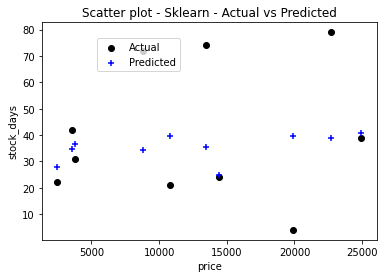

In [256]:
# Plot outputs

## stock_days vs price
X_arr_idx = X_set_4.index('price')
plt.scatter(X_test[:10, X_arr_idx], y_test[:10],  color='black', label='Actual')
#plt.plot(X_test[:10, X_arr_idx], y_test_preds[:10], color='blue', linewidth=3, label='Predicted')
plt.scatter(X_test[:10, X_arr_idx], y_test_preds[:10],  color='blue', label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted')
plt.xlabel('price')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

In [257]:
abc = np.array([30, 20, 50, 100])
rordidx = np.argsort(abc)
abc1 = abc[rordidx]
abc[2] = 5000
print(abc)
print(abc1)
print(f"")
abc = np.array([30, 20, 50, 100])
np.sort(abc)
print(abc)
print(type(abc))
print(type(abc.tolist()))

[  30   20 5000  100]
[ 20  30  50 100]

[ 30  20  50 100]
<class 'numpy.ndarray'>
<class 'list'>


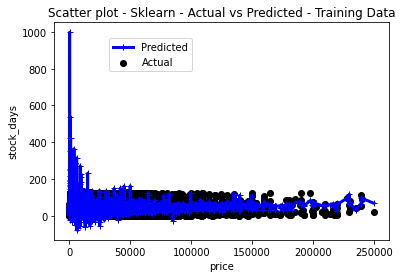

In [258]:
# Plot outputs

## stock_days vs price
X_arr_idx = X_set_4.index('price')

X_train_sort_idx = np.argsort(np.array(X_train[:, X_arr_idx]))
X_train_sorted = np.sort(np.array(X_train[:, X_arr_idx])).tolist()
y_train_sorted = np.array(y_train)[X_train_sort_idx].tolist()
y_train_preds_sorted = np.array(y_train_preds)[X_train_sort_idx].tolist()

plt.scatter(X_train_sorted, y_train_sorted,  color='black', label='Actual')
plt.plot(X_train_sorted, y_train_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted - Training Data')
plt.xlabel('price')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

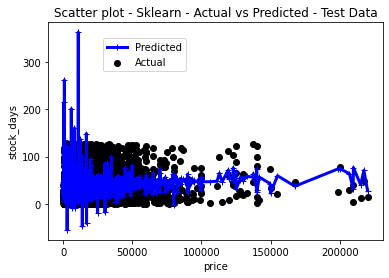

In [259]:
# Plot outputs

## stock_days vs price
X_arr_idx = X_set_4.index('price')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted - Test Data')
plt.xlabel('price')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

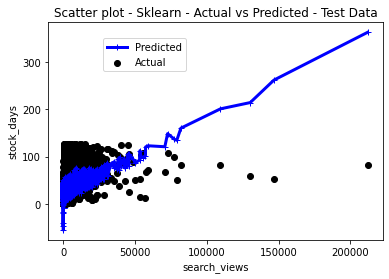

In [260]:
# Plot outputs

## stock_days vs search_views
X_arr_idx = X_set_4.index('search_views')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted - Test Data')
plt.xlabel('search_views')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

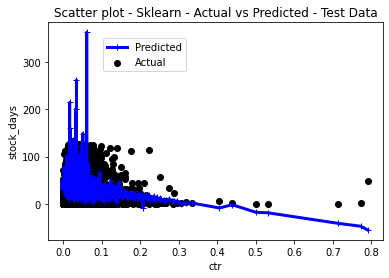

In [261]:
# Plot outputs

## stock_days vs ctr
X_arr_idx = X_set_4.index('ctr')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted', marker='+')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Sklearn - Actual vs Predicted - Test Data')
plt.xlabel('ctr')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

### using Statsmodels

Observations

R2 score matches the R2 score from scikit-learn.

parameters = [ 2.30755304e+01  1.09164424e-04  1.58045211e-03 -1.12688983e+02
  1.65486603e+01  1.20389027e+01 -5.51203264e+00 -4.23677053e-01]

pvalues = [0.00000000e+000 3.32802605e-049 0.00000000e+000 1.77485726e-303
 0.00000000e+000 7.22932002e-033 4.10569347e-019 6.30312911e-114]

tvalues = [ 54.96204332  14.75615858  82.2341256  -37.42066062  42.24323869
  11.94716347  -8.93665134 -22.72664371]

rsquared = 0.11691932227507751

rsquared_adj = 0.11684394944172272

stock_days = 0.000109164424 * price + 0.00158045211 * search_views - 112.688983 * ctr + 16.5486603 * prod_tier_type_is_Basic + 12.0389027 * prod_tier_type_is_Plus - 5.51203264 * prod_tier_type_is_Premium - 0.423677053 * veh_age + 23.0755304

still very poor model as only 11.68% variation explained (adjusted R2 score)

same beta and intercept as from scikit-learn for most variables, BUT different for the one-hot coded product_tier variables

In [262]:
X_set_4 = ['price', 'search_views', 'ctr', 'prod_tier_type_is_Basic', 'prod_tier_type_is_Plus',
       'prod_tier_type_is_Premium', 'veh_age']

In [263]:
for col in X_set_4:
    print(f"{col} : {dflr[col].isnull().sum()}")

price : 0
search_views : 0
ctr : 0
prod_tier_type_is_Basic : 0
prod_tier_type_is_Plus : 0
prod_tier_type_is_Premium : 0
veh_age : 0


In [264]:
X, y = dflr[X_set_4].to_numpy(), dflr[['stock_days']].to_numpy()

In [265]:
X[np.argwhere(np.isnan(X))]

array([], shape=(0, 2, 7), dtype=float64)

In [266]:
y[np.argwhere(np.isnan(y))]

array([], shape=(0, 2, 1), dtype=int64)

In [267]:
print(np.any(np.isnan(X)))      ## expecting False
print(np.all(np.isfinite(X)))   ## expecting True
print(np.any(np.isnan(y)))      ## expecting False
print(np.all(np.isfinite(y)))   ## expecting True

False
True
False
True


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=444)

In [269]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(78116, 7)
(70304, 7)
(7812, 7)
(78116, 1)
(70304, 1)
(7812, 1)


In [270]:
X_train_sm = sm.add_constant(X_train) # adding a constant
print(type(X_train_sm))
print(X_train_sm.shape, X_train.shape)
print(f"")
X_test_sm = sm.add_constant(X_test) # adding a constant
print(X_test_sm.shape, X_test.shape)

<class 'numpy.ndarray'>
(70304, 8) (70304, 7)

(7812, 8) (7812, 7)


In [271]:
lrStatsModel4 = sm.OLS(y_train, X_train_sm).fit()

In [272]:
lrStatsModel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1551.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        02:33:31   Log-Likelihood:            -3.3942e+05
No. Observations:               70304   AIC:                         6.788e+05
Df Residuals:                   70297   BIC:                         6.789e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0755      0.420     54.962      0.000      22.253      23.898
x1             0.0001    7.4e-06     14.756      0.000    9.47e-05       0.000
x2             0.0016   1.92e-05     82.234      0.000       0.002       0.002
x3          -112.6890      3.011    -37.421      0.000    -118.591    -106.787
x4            16.5487      0.392     42.243      0.000      15.781      17.316
x5            12.0389      1.008     11.947      0.000      10.064      14.014
x6            -5.5120      0.617     -8.937      0.000      -6.721      -4.303
x7            -0.4237      0.019    -22.727      0.000      -0.460      -0.387
==============================================================================
Omnibus:                    15423.255   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           469678.898
Skew:                           0.381   Prob(JB):                         0.00
Kurtosis:                      15.639   Cond. No.                     3.73e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.5e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [273]:
print(f"parameters = {lrStatsModel4.params}")
print(f"\npvalues = {lrStatsModel4.pvalues}")
print(f"\ntvalues = {lrStatsModel4.tvalues}")
print(f"\nrsquared = {lrStatsModel4.rsquared}")
print(f"\nrsquared_adj = {lrStatsModel4.rsquared_adj}")

parameters = [ 2.30755304e+01  1.09164424e-04  1.58045211e-03 -1.12688983e+02
  1.65486603e+01  1.20389027e+01 -5.51203264e+00 -4.23677053e-01]

pvalues = [0.00000000e+000 3.32802605e-049 0.00000000e+000 1.77485726e-303
 0.00000000e+000 7.22932002e-033 4.10569347e-019 6.30312911e-114]

tvalues = [ 54.96204332  14.75615858  82.2341256  -37.42066062  42.24323869
  11.94716347  -8.93665134 -22.72664371]

rsquared = 0.11691932227507751

rsquared_adj = 0.11684394944172272


In [274]:
y_train_preds = lrStatsModel4.predict(X_train_sm)
y_test_preds = lrStatsModel4.predict(X_test_sm)

print(y_train_preds, y_train_preds.shape)
print(f"")
print(y_test_preds, y_test_preds.shape)

[32.69667977 35.20529444 40.18097103 ... 41.42304606 45.57134736
 26.61659236] (70304,)

[36.6228632  40.79757515 38.78829899 ... 38.69188452 14.61354496
 24.67135584] (7812,)


In [275]:
#sm_rmse_model_4_train = sm_rmse(x1=y_train, x2=y_train_preds)
#print(f"sm_rmse_model_4_train =\n{sm_rmse_model_2_train}")
sm_rmse_model_4_test = sm_rmse(x1=y_test, x2=y_test_preds)
print(f"sm_rmse_model_4_test =\n{sm_rmse_model_2_test}")

sm_rmse_model_4_test =
[32.34997113 32.36261467 32.40615877 ... 32.30053573 32.31173156
 33.40380632]


In [276]:
lrStatsModel4.resid

array([ -7.69667977,   9.79470556,  37.81902897, ...,  70.57695394,
       -12.57134736, -25.61659236])

In [277]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(f"")
print(y.shape)
print(y_train.shape)
print(y_test.shape)
print(f"")
print(X_train_sm.shape, X_train.shape)
print(f"")
print(X_test_sm.shape, X_test.shape)

(78116, 7)
(70304, 7)
(7812, 7)

(78116, 1)
(70304, 1)
(7812, 1)

(70304, 8) (70304, 7)

(7812, 8) (7812, 7)


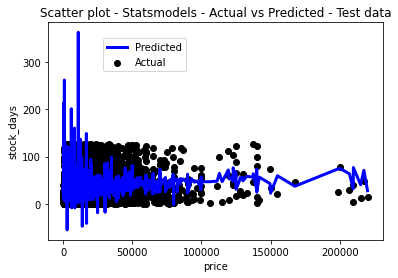

In [278]:
# Plot outputs

## stock_days vs price
X_arr_idx = X_set_4.index('price')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Statsmodels - Actual vs Predicted - Test data')
plt.xlabel('price')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

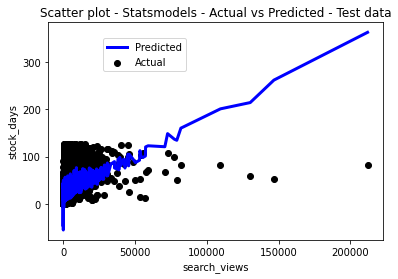

In [279]:
# Plot outputs

## stock_days vs search_views
X_arr_idx = X_set_2.index('search_views')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Statsmodels - Actual vs Predicted - Test data')
plt.xlabel('search_views')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

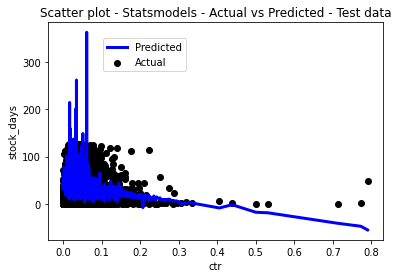

In [280]:
# Plot outputs

## stock_days vs ctr
X_arr_idx = X_set_2.index('ctr')

X_test_sort_idx = np.argsort(np.array(X_test[:, X_arr_idx]))
X_test_sorted = np.sort(np.array(X_test[:, X_arr_idx])).tolist()
y_test_sorted = np.array(y_test)[X_test_sort_idx].tolist()
y_test_preds_sorted = np.array(y_test_preds)[X_test_sort_idx].tolist()

plt.scatter(X_test_sorted, y_test_sorted,  color='black', label='Actual')
plt.plot(X_test_sorted, y_test_preds_sorted, color='blue', linewidth=3, label='Predicted')

plt.xticks()
plt.yticks()

plt.title('Scatter plot - Statsmodels - Actual vs Predicted - Test data')
plt.xlabel('ctr')
plt.ylabel('stock_days')

#plt.legend(loc='upper left')
plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

#plt.tight_layout()
plt.show()

In [ ]:
############################################
############################################
############################################

## Model 5 - Neural Network - Linear Model with PyTorch

In [281]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms
#from torchsummary import summary
#import torch.utils.data as data_utils

In [282]:
dflrnn = df.copy()
list(dflrnn.columns)

['trk',
 'article_id',
 'product_tier',
 'make_name',
 'price',
 'first_zip_digit',
 'first_registration_year',
 'created_date',
 'deleted_date',
 'search_views',
 'detail_views',
 'stock_days',
 'ctr',
 'cr_dt',
 'de_dt']

In [236]:
dftemp = dflrnn['make_name'].unique()
dftemp.sort()
print(dftemp)

['AC' 'Abarth' 'Aixam' 'Alfa Romeo' 'Alpina' 'Alpine' 'Amphicar'
 'Aston Martin' 'Audi' 'Austin' 'BMW' 'Bentley' 'Buick' 'Cadillac'
 'Caravans-Wohnm' 'Casalini' 'Chatenet' 'Chevrolet' 'Chrysler' 'Citroen'
 'Corvette' 'DFSK' 'DS Automobiles' 'Dacia' 'Daewoo' 'Daihatsu' 'Daimler'
 'De Tomaso' 'Dodge' 'Donkervoort' 'FISKER' 'Ferrari' 'Fiat' 'Ford' 'GMC'
 'Grecav' 'HUMMER' 'Honda' 'Hyundai' 'Infiniti' 'Isuzu' 'Iveco' 'Jaguar'
 'Jeep' 'KTM' 'Kawasaki' 'Kia' 'Lamborghini' 'Lancia' 'Land Rover' 'Lexus'
 'Ligier' 'Lincoln' 'Lotus' 'MAN' 'MG' 'MINI' 'Maserati' 'Mazda' 'McLaren'
 'Mercedes-Benz' 'Microcar' 'Mitsubishi' 'Morgan' 'Nissan' 'Oldsmobile'
 'Oldtimer' 'Opel' 'Others ' 'Peugeot' 'Piaggio' 'Pontiac' 'Porsche'
 'Renault' 'Rolls-Royce' 'Rover' 'SEAT' 'Saab' 'Skoda' 'SsangYong'
 'Subaru' 'Suzuki' 'TVR' 'Tata' 'Tesla' 'Toyota' 'Triumph' 'Trucks-Lkw'
 'Volkswagen' 'Volvo' 'smart']


In [237]:
dflrnn.drop(columns=['trk', 'article_id', 'make_name','first_registration_year', 'created_date', 'deleted_date', 'detail_views', 'cr_dt', 'de_dt'], inplace=True)
list(dflrnn.columns)

['product_tier',
 'price',
 'first_zip_digit',
 'search_views',
 'stock_days',
 'ctr']

In [238]:
dflrnn['product_tier'].replace(
    to_replace={'Basic': 0, 'Plus': 1, 'Premium': 2},
    inplace=True
)

In [239]:
print(f"Column name, minimum, maximum, range\n")
for v in zip(dflrnn.columns, list(dflrnn.min()), list(dflrnn.max()), list(dflrnn.max() - dflrnn.min())):
    print(f"{v}")

Column name, minimum, maximum, range

('product_tier', 0.0, 2.0, 2.0)
('price', 50.0, 249888.0, 249838.0)
('first_zip_digit', 1.0, 9.0, 8.0)
('search_views', 1.0, 608754.0, 608753.0)
('stock_days', 0.0, 127.0, 127.0)
('ctr', 0.0, 1.0, 1.0)


### Observations and transformations done:

The ranges for "price" and "search_views" is huge compared to other values.
The ctr is only between 0 to 1.

So applying these transformations:
    log10 on price and search_views;
    ctr multipled by 10.

After these tranformations, all the ranges are comparable.
Not doing any feature scaling for now.

In [240]:
dflrnn['price_tf'] = np.log10(dflrnn['price'])
dflrnn['search_views_tf'] = np.log10(dflrnn['search_views'])
dflrnn['ctr_tf'] = dflrnn['ctr'] * 10

In [241]:
print(f"Column name, minimum, maximum, range\n")
for v in zip(dflrnn.columns, list(dflrnn.min()), list(dflrnn.max()), list(dflrnn.max() - dflrnn.min())):
    print(f"{v}")

Column name, minimum, maximum, range

('product_tier', 0.0, 2.0, 2.0)
('price', 50.0, 249888.0, 249838.0)
('first_zip_digit', 1.0, 9.0, 8.0)
('search_views', 1.0, 608754.0, 608753.0)
('stock_days', 0.0, 127.0, 127.0)
('ctr', 0.0, 1.0, 1.0)
('price_tf', 1.6989700043360187, 5.397745401148804, 3.6987753968127857)
('search_views_tf', 0.0, 5.784441827893689, 5.784441827893689)
('ctr_tf', 0.0, 10.0, 10.0)


# Simple PyTorch regression example

PyTorch Machine Learning Tutorial - Machine Learning with Python and PyTorch

https://www.youtube.com/watch?v=4MpZIoV_g7k

In [242]:
import torch

In [243]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# y = w*x + b is what we wanna do as a prediction

In [244]:
def forward(x):
    y = w*x + b
    return y

In [248]:
# one input
x = torch.tensor(4)
forward(x)

tensor(13., grad_fn=<AddBackward0>)

In [249]:
# one input
x = torch.tensor([4])
forward(x)

tensor([13.], grad_fn=<AddBackward0>)

In [250]:
# multiple inputs - extra brackets as forward function expects only one input x
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

### Using Linear model built in

In [252]:
import torch
from torch.nn import Linear

In [254]:
torch.manual_seed(1) #seed for random values
model = Linear(in_features=1, out_features=1)

In [255]:
print(model.weight, model.bias)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [258]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [259]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


### Custom regression  modules

In [325]:
import torch
import torch.nn as nn
import numpy as np

In [326]:
torch.manual_seed(1)

In [327]:
class myLR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(in_features=input_size, out_features=output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [328]:
model = myLR(1, 1)

In [329]:
## this will not work now
print(model.weight, model.bias)

AttributeError: 'myLR' object has no attribute 'weight'

In [330]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [331]:
x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)


In [332]:
x = torch.tensor([[2.0], [3.3]])
print(model.forward(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


### Creating dataset

In [348]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [349]:
## random values normally distributed with mean 0, sigma = 1
X = torch.randn(100, 1)
print(X[:10])

tensor([[-0.6540],
        [-1.6095],
        [-0.1002],
        [-0.6092],
        [-0.9798],
        [-1.6091],
        [-1.1660],
        [-1.0748],
        [-0.7773],
        [-0.2515]])


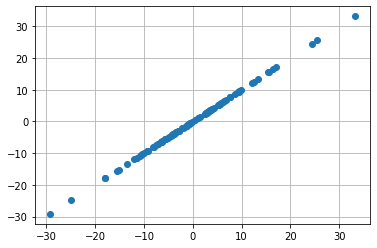

In [350]:
## if we use y = X, then its already a pure linear relationship data for y = f(x)
X = torch.randn(100, 1) * 10
y = X
plt.plot(X.numpy(), y.numpy(), 'o')
plt.grid()

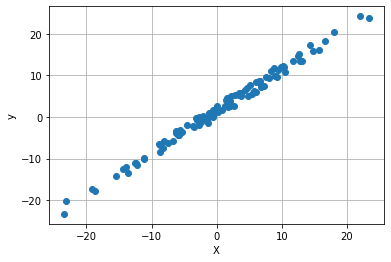

In [351]:
## random values are small around 0, so increasing the values and adding some noise that is also normally distributed
X = torch.randn(100, 1) * 10
y = X + torch.rand(100, 1) * 3
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('X')
plt.grid()

In [352]:
torch.manual_seed(1)

In [353]:
class myLR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(in_features=input_size, out_features=output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [354]:
model = myLR(1, 1)

In [355]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [356]:
## see how the model is doing with the random weight and bias parameter initialised

In [357]:
## extract the model parameters
[w, b] = model.parameters()
print(w, b)
print(type(w))
print()
## extract the actual parameter values as tensors
w1 = w[0][0]
b1 = b[0]
print(w1, b1)
print(type(w1))
print()
## extract as python data types
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)
print(type(w1))

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
<class 'torch.nn.parameter.Parameter'>

tensor(0.5153, grad_fn=<SelectBackward>) tensor(-0.4414, grad_fn=<SelectBackward>)
<class 'torch.Tensor'>

0.5152631998062134 -0.44137823581695557
<class 'float'>


In [358]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [359]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')  ## plot line
    plt.scatter(X, y)
    plt.grid()
    plt.show()

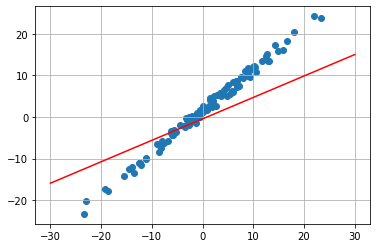

In [360]:
plot_fit('Initial Model')

### Linear Regression
### Loss Function using the MSE (Mean Squared Error)
### Actually training the model

In [463]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [464]:
torch.manual_seed(1)

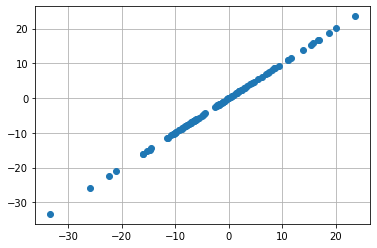

In [462]:
## if we use y = X, then its already a pure linear relationship data for y = f(x)
## randn gives random values normally distributed with mean 0, sigma = 1
X = torch.randn(100, 1) * 10
y = X
plt.plot(X.numpy(), y.numpy(), 'o')
plt.grid()

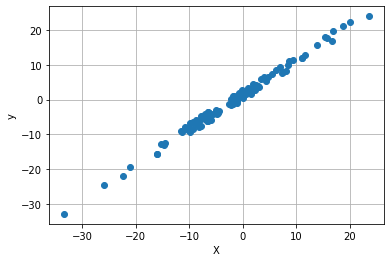

In [465]:
## random values are small around 0, so increasing the values and adding some noise that is also normally distributed
X = torch.randn(100, 1) * 10
y = X + 3*torch.rand(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('X')
plt.grid()

In [466]:
class myLR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(in_features=input_size, out_features=output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [467]:
model = myLR(1, 1)

In [468]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.7392]], requires_grad=True), Parameter containing:
tensor([-0.7216], requires_grad=True)]


In [469]:
## see how the model is doing with the random weight and bias parameter initialised

In [470]:
## extract the model parameters
[w, b] = model.parameters()
print(w, b)
print(type(w))
print()
## extract the actual parameter values as tensors
w1 = w[0][0]
b1 = b[0]
print(w1, b1)
print(type(w1))
print()
## extract as python data types
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)
print(type(w1))

Parameter containing:
tensor([[0.7392]], requires_grad=True) Parameter containing:
tensor([-0.7216], requires_grad=True)
<class 'torch.nn.parameter.Parameter'>

tensor(0.7392, grad_fn=<SelectBackward>) tensor(-0.7216, grad_fn=<SelectBackward>)
<class 'torch.Tensor'>

0.7392226457595825 -0.7216314077377319
<class 'float'>


In [471]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [472]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')  ## plot line
    plt.scatter(X, y)
    plt.grid()
    plt.show()

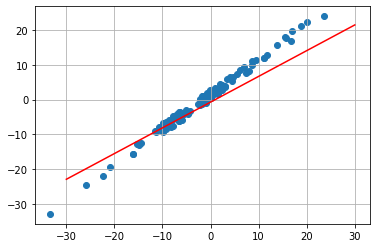

In [473]:
plot_fit('Initial Model')

In [474]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [475]:
losses = list()
epochs = 100
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print(f"Epoch {i} : Loss = {loss.item()}")
    losses.append(loss.item())
    
    optimizer.zero_grad() ## reset the gradients to 0, as they accumulate by default
    loss.backward() ## compute the gradients
    optimizer.step() ## update the model pareters

Epoch 0 : Loss = 10.313336372375488
Epoch 1 : Loss = 9.929397583007812
Epoch 2 : Loss = 9.560973167419434
Epoch 3 : Loss = 9.207437515258789
Epoch 4 : Loss = 8.868195533752441
Epoch 5 : Loss = 8.542667388916016
Epoch 6 : Loss = 8.23028564453125
Epoch 7 : Loss = 7.930517673492432
Epoch 8 : Loss = 7.642861843109131
Epoch 9 : Loss = 7.366825103759766
Epoch 10 : Loss = 7.101929187774658
Epoch 11 : Loss = 6.8477325439453125
Epoch 12 : Loss = 6.603792667388916
Epoch 13 : Loss = 6.369702339172363
Epoch 14 : Loss = 6.145058631896973
Epoch 15 : Loss = 5.929476737976074
Epoch 16 : Loss = 5.722592830657959
Epoch 17 : Loss = 5.524054527282715
Epoch 18 : Loss = 5.333519458770752
Epoch 19 : Loss = 5.150669097900391
Epoch 20 : Loss = 4.975190162658691
Epoch 21 : Loss = 4.806783199310303
Epoch 22 : Loss = 4.6451640129089355
Epoch 23 : Loss = 4.490057468414307
Epoch 24 : Loss = 4.3411993980407715
Epoch 25 : Loss = 4.198339462280273
Epoch 26 : Loss = 4.061230659484863
Epoch 27 : Loss = 3.929645299911499

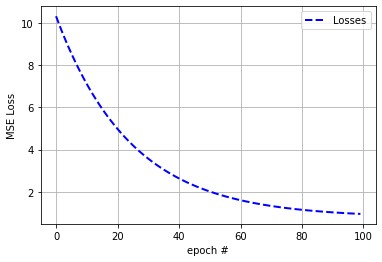

In [476]:
plt.title = 'MSE Losses vs Epoch'
plt.xlabel('epoch #')
plt.ylabel('MSE Loss')

plt.plot(range(epochs), losses, color='blue', linestyle= '--', linewidth=2, label='Losses')

plt.legend(loc='upper right')
#plt.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85, 0.1, 0.1))

plt.grid()
plt.show()

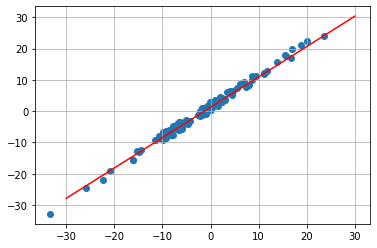

In [477]:
plot_fit('After Training')